<a href="https://colab.research.google.com/github/merveatis/Credit_Risk_Analysis_Logit/blob/main/Credit_Risk_Analysis_Logit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

İmporting Libraries

In [138]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(rc={'figure.figsize':(20,10)})

In [139]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kabure/german-credit-data-with-risk")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'german-credit-data-with-risk' dataset.
Path to dataset files: /kaggle/input/german-credit-data-with-risk


In [140]:
# The path variable is a string, so we need to read the data from the path.
import os

# Assuming the dataset is a single CSV file in the downloaded directory
# You might need to adjust the filename if there are multiple files or a different structure
file_path = os.path.join(path, 'german_credit_data.csv')
df = pd.read_csv(file_path)

display(df.head())

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [141]:
pip install ucimlrepo

In [142]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
statlog_german_credit_data = fetch_ucirepo(id=144)

# data (as pandas dataframes)
df = statlog_german_credit_data.data.features
y = statlog_german_credit_data.data.targets

# metadata
print(statlog_german_credit_data.metadata)

# variable information
print(statlog_german_credit_data.variables)



{'uci_id': 144, 'name': 'Statlog (German Credit Data)', 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data', 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv', 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1000, 'num_features': 20, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5NC77', 'creators': ['Hans Hofmann'], 'intro_paper': None, 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in the form provided by

In [143]:
df.columns = [
     "checking_account", "duration", "credit_history", "purpose", "credit_amount",
    "savings_account", "employment_since", "installment_rate", "personal_status_sex",
    "other_debtors", "residence_since", "property", "age", "installment_plans", "housing",
    "existing_credits", "job", "people_liable", "telephone", "foreign_worker"
]

In [144]:
df_copy = df.copy()

In [145]:
y.columns = [
"CreditStatus"
]

In [146]:
y. columns = ["Creditability"]

In [147]:
y.head()

,Creditability
0,1
1,2
2,1
3,1
4,2


In [148]:

df.head()

,checking_account,duration,credit_history,purpose,credit_amount,savings_account,employment_since,installment_rate,personal_status_sex,other_debtors,residence_since,property,age,installment_plans,housing,existing_credits,job,people_liable,telephone,foreign_worker
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201


In [149]:


df['checking_account'].unique()


array(['A11', 'A12', 'A14', 'A13'], dtype=object)

In [150]:
# Checking account status
checking_account_map = {
    'A11': '>0',
    'A12': '200',
    'A13': '200+',
    'A14': 'no checking account'
}
df['checking_account'] = df['checking_account'].map(checking_account_map)

# Credit history
credit_history_map = {
    'A30': 'no_credits_all_paid',
    'A31': 'all_credits_paid_this_bank',
    'A32': 'existing_credits_paid',
    'A33': 'delayed_payment',
    'A34': 'critical_account_other_loans'
}
df['credit_history'] = df['credit_history'].map(credit_history_map)

# Purpose
purpose_map = {
    'A40': 'new_car',
    'A41': 'used_car',
    'A42': 'furniture_equipment',
    'A43': 'radio_tv',
    'A44': 'domestic_appliances',
    'A45': 'repairs',
    'A46': 'education',
    'A47': 'vacation',
    'A48': 'retraining',
    'A49': 'business',
    'A410': 'others'
}
df['purpose'] = df['purpose'].map(purpose_map)

# Savings account
savings_account_map = {
    'A61': '100',
    'A62': '500',
    'A63': '1000',
    'A64': '1000+',
    'A65': 'unknown'
}
df['savings_account'] = df['savings_account'].map(savings_account_map)

# Present employment since
employment_map = {
    'A71': 'unemployed',
    'A72': '1',
    'A73': '4',
    'A74': '7',
    'A75': '+7'
}
df['employment_since'] = df['employment_since'].map(employment_map)

# Personal status and sex
personal_status_map = {
    'A91': 'male_divorced_separated',
    'A92': 'female_div_sep_married',
    'A93': 'male_single',
    'A94': 'male_married_widowed',
    'A95': 'female_single'
}
df['personal_status_sex'] = df['personal_status_sex'].map(personal_status_map)

# Other debtors / guarantors
other_debtors_map = {
    'A101': 'none',
    'A102': 'co_applicant',
    'A103': 'guarantor'
}
df['other_debtors'] = df['other_debtors'].map(other_debtors_map)

# Property
property_map = {
    'A121': 'real_estate',
    'A122': 'building_society_life_insurance',
    'A123': 'car_or_other',
    'A124': 'unknown_or_no_property'
}
df['property'] = df['property'].map(property_map)

# Other installment plans
installment_plans_map = {
    'A141': 'bank',
    'A142': 'stores',
    'A143': 'none'
}
df['installment_plans'] = df['installment_plans'].map(installment_plans_map)

# Housing
housing_map = {
    'A151': 'rent',
    'A152': 'own',
    'A153': 'for_free'
}
df['housing'] = df['housing'].map(housing_map)

# Job
job_map = {
    'A171': '0',
    'A172': '1',
    'A173': '2',
    'A174': '3'
}
df['job'] = df['job'].map(job_map)

# Telephone
telephone_map = {
    ' A191 ': 'no',
    'A192': 'yes'
}
df['telephone'] = df['telephone'].map(telephone_map)

# Foreign worker
foreign_worker_map = {
    'A201': 'yes',
    'A202': 'no'
}
df['foreign_worker'] = df['foreign_worker'].map(foreign_worker_map)


/tmp/ipython-input-3488348470.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['checking_account'] = df['checking_account'].map(checking_account_map)
/tmp/ipython-input-3488348470.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['credit_history'] = df['credit_history'].map(credit_history_map)
/tmp/ipython-input-3488348470.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [151]:
df.head()

,checking_account,duration,credit_history,purpose,credit_amount,savings_account,employment_since,installment_rate,personal_status_sex,other_debtors,residence_since,property,age,installment_plans,housing,existing_credits,job,people_liable,telephone,foreign_worker
0,>0,6,critical_account_other_loans,radio_tv,1169,unknown,+7,4,male_single,none,4,real_estate,67,none,own,2,2,1,yes,yes
1,200,48,existing_credits_paid,radio_tv,5951,100,4,2,female_div_sep_married,none,2,real_estate,22,none,own,1,2,1,NaN,yes
2,no checking account,12,critical_account_other_loans,education,2096,100,7,2,male_single,none,3,real_estate,49,none,own,1,1,2,NaN,yes
3,>0,42,existing_credits_paid,furniture_equipment,7882,100,7,2,male_single,guarantor,4,building_society_life_insurance,45,none,for_free,1,2,2,NaN,yes
4,>0,24,delayed_payment,new_car,4870,100,4,3,male_single,none,4,unknown_or_no_property,53,none,for_free,2,2,2,NaN,yes


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   checking_account     1000 non-null   object
 1   duration             1000 non-null   int64 
 2   credit_history       1000 non-null   object
 3   purpose              1000 non-null   object
 4   credit_amount        1000 non-null   int64 
 5   savings_account      1000 non-null   object
 6   employment_since     1000 non-null   object
 7   installment_rate     1000 non-null   int64 
 8   personal_status_sex  1000 non-null   object
 9   other_debtors        1000 non-null   object
 10  residence_since      1000 non-null   int64 
 11  property             1000 non-null   object
 12  age                  1000 non-null   int64 
 13  installment_plans    1000 non-null   object
 14  housing              1000 non-null   object
 15  existing_credits     1000 non-null   int64 
 16  job    

In [153]:
df.describe()

,duration,credit_amount,installment_rate,residence_since,age,existing_credits,people_liable
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [154]:
df.nunique()

,0
checking_account,4
duration,33
credit_history,5
purpose,10
credit_amount,921
savings_account,5
employment_since,5
installment_rate,4
personal_status_sex,4
other_debtors,3


In [155]:
df.duplicated().sum()

np.int64(0)

In [156]:
numerical_columns = df.select_dtypes("int64").columns

In [157]:
numerical_columns

Index(['duration', 'credit_amount', 'installment_rate', 'residence_since',
       'age', 'existing_credits', 'people_liable'],
      dtype='object')

In [158]:
# Kategorik olanlar ile Kategorik olmayan kolonları ayrıldı
uncategorical=[]
categoric=[]
for i in df.columns:
    a=df[i].nunique()
    if a>11:
        uncategorical.append(i)
    else:
        categoric.append(i)

In [159]:
uncategorical

['duration', 'credit_amount', 'age']

In [160]:

uncategorical = df[uncategorical]
uncategorical.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0


In [161]:
num_cols = len(uncategorical)
num_rows = (num_cols + 1) // 2



/tmp/ipython-input-1573138527.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,


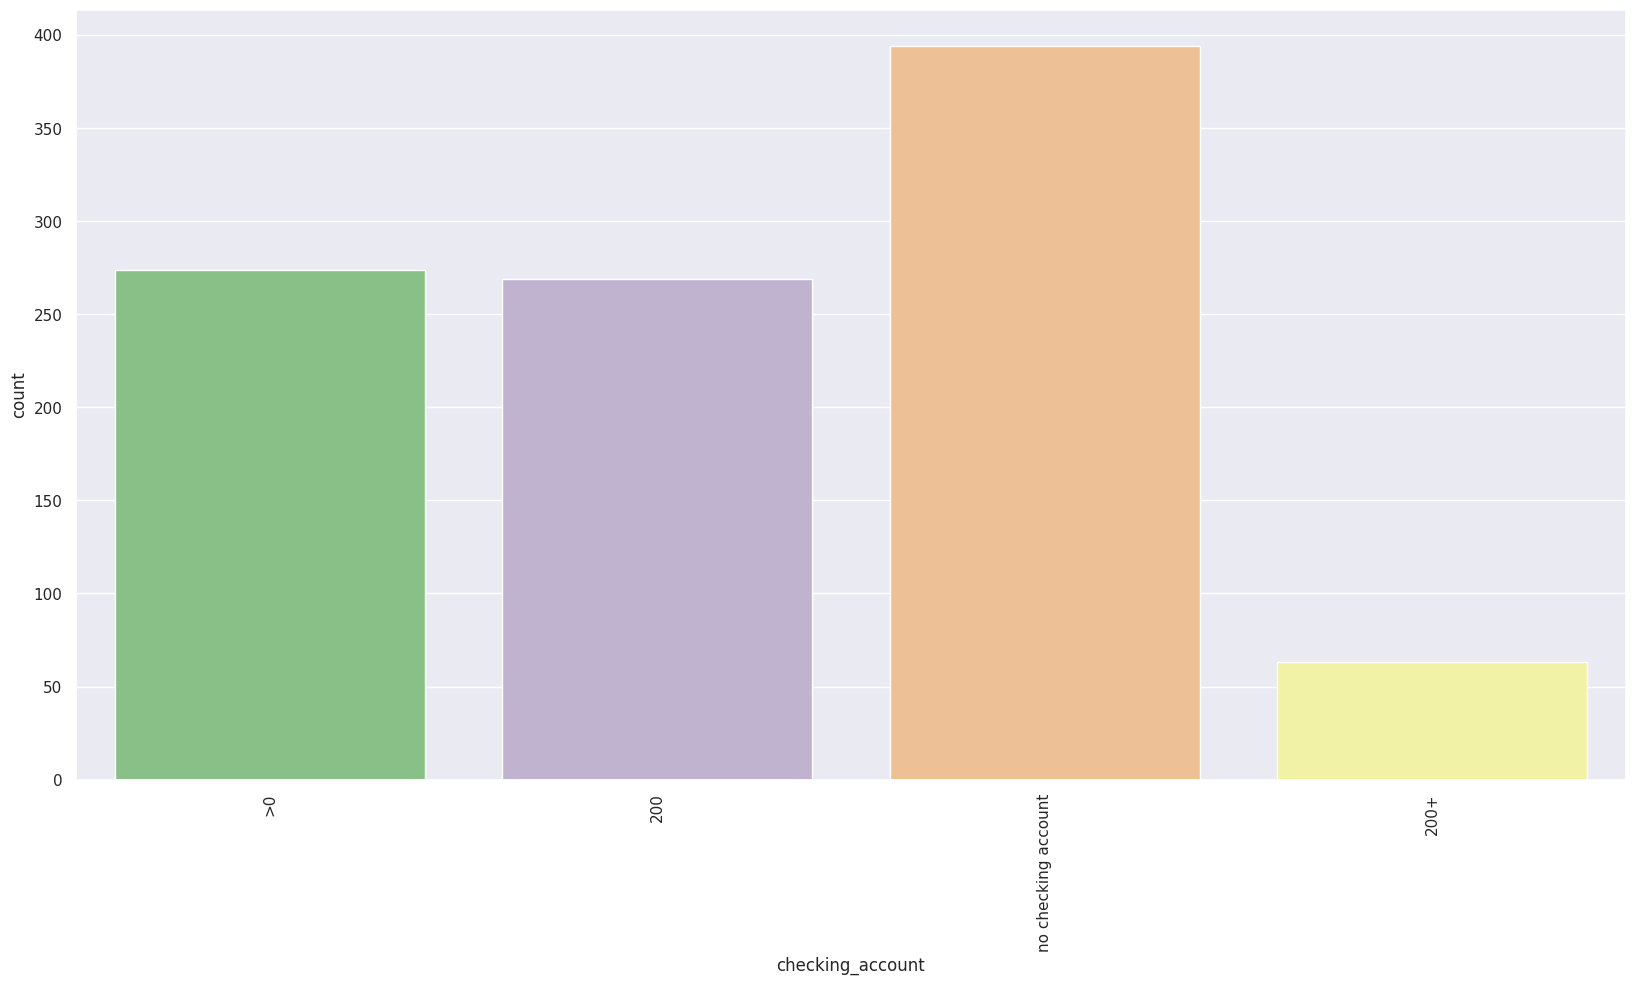

/tmp/ipython-input-1573138527.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,


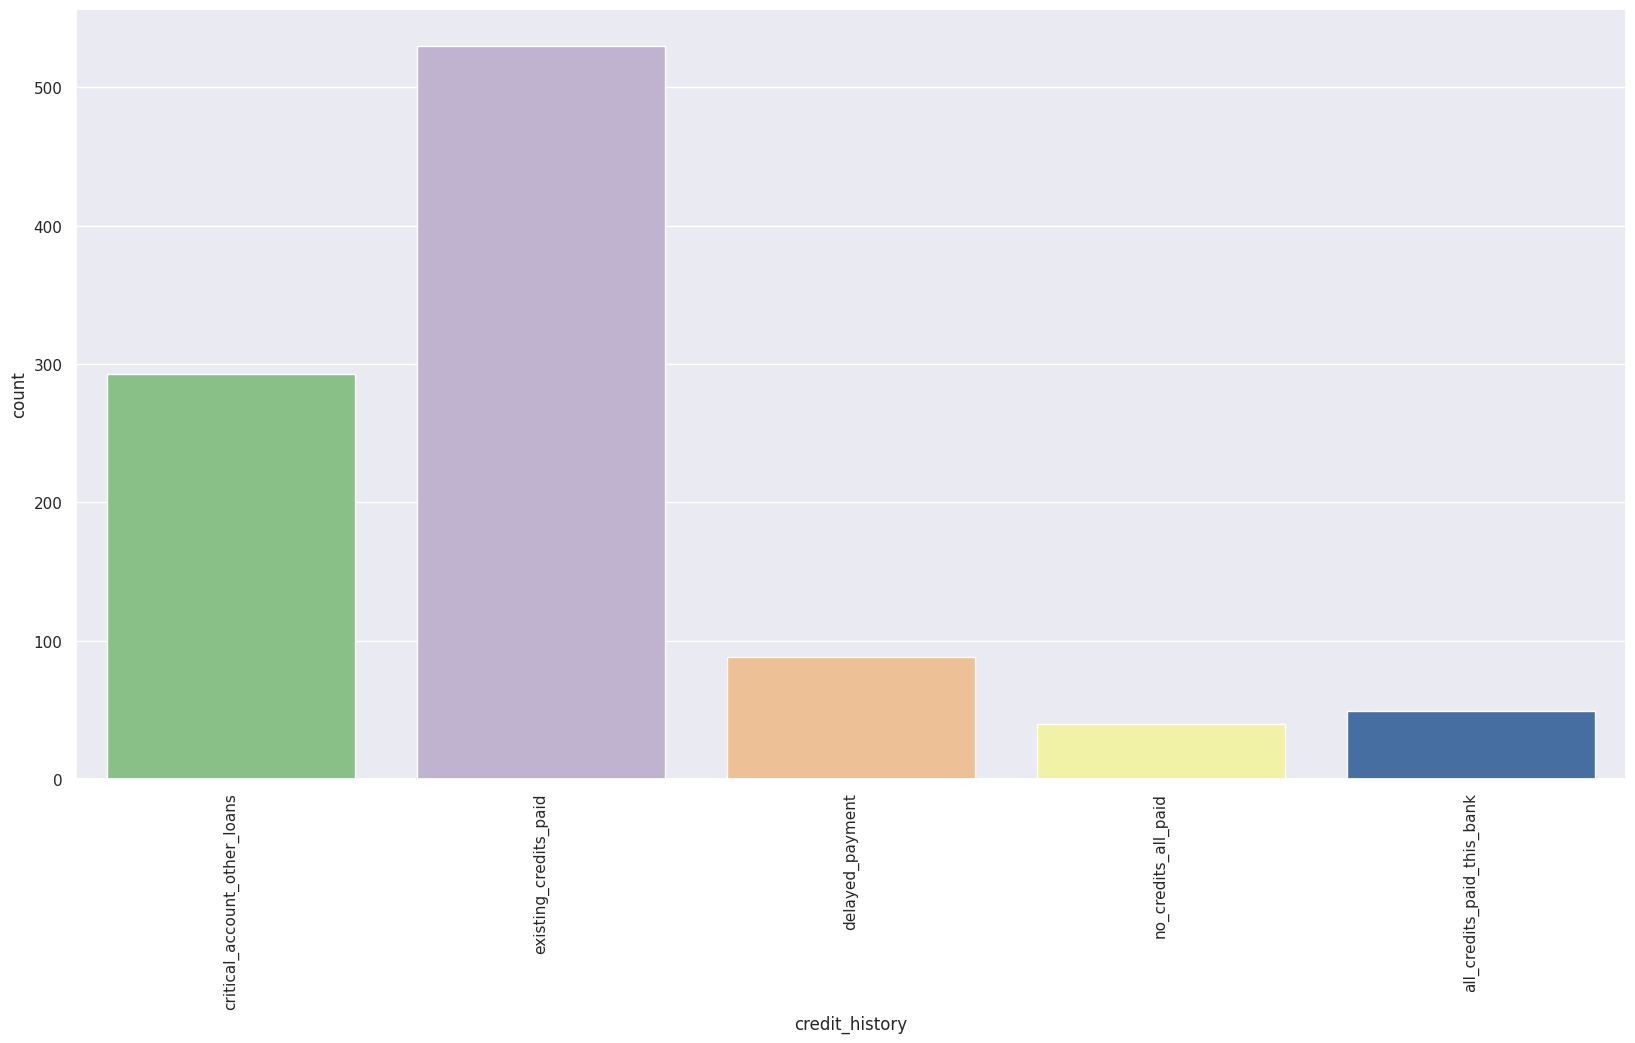

/tmp/ipython-input-1573138527.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,


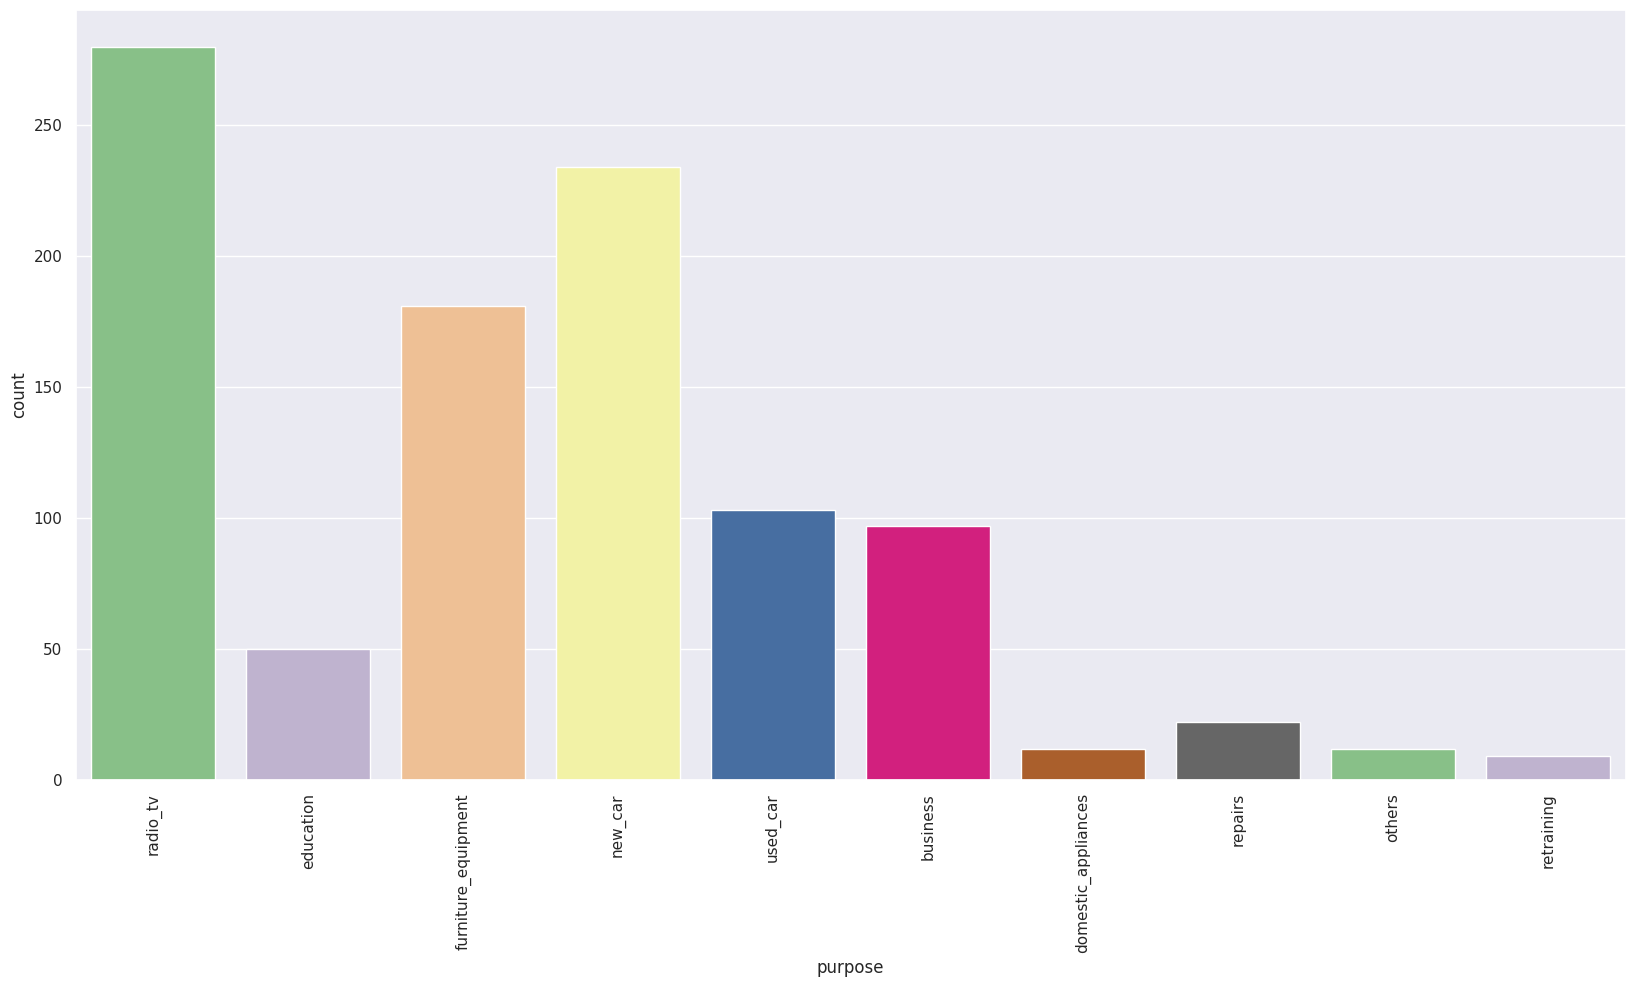

/tmp/ipython-input-1573138527.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,


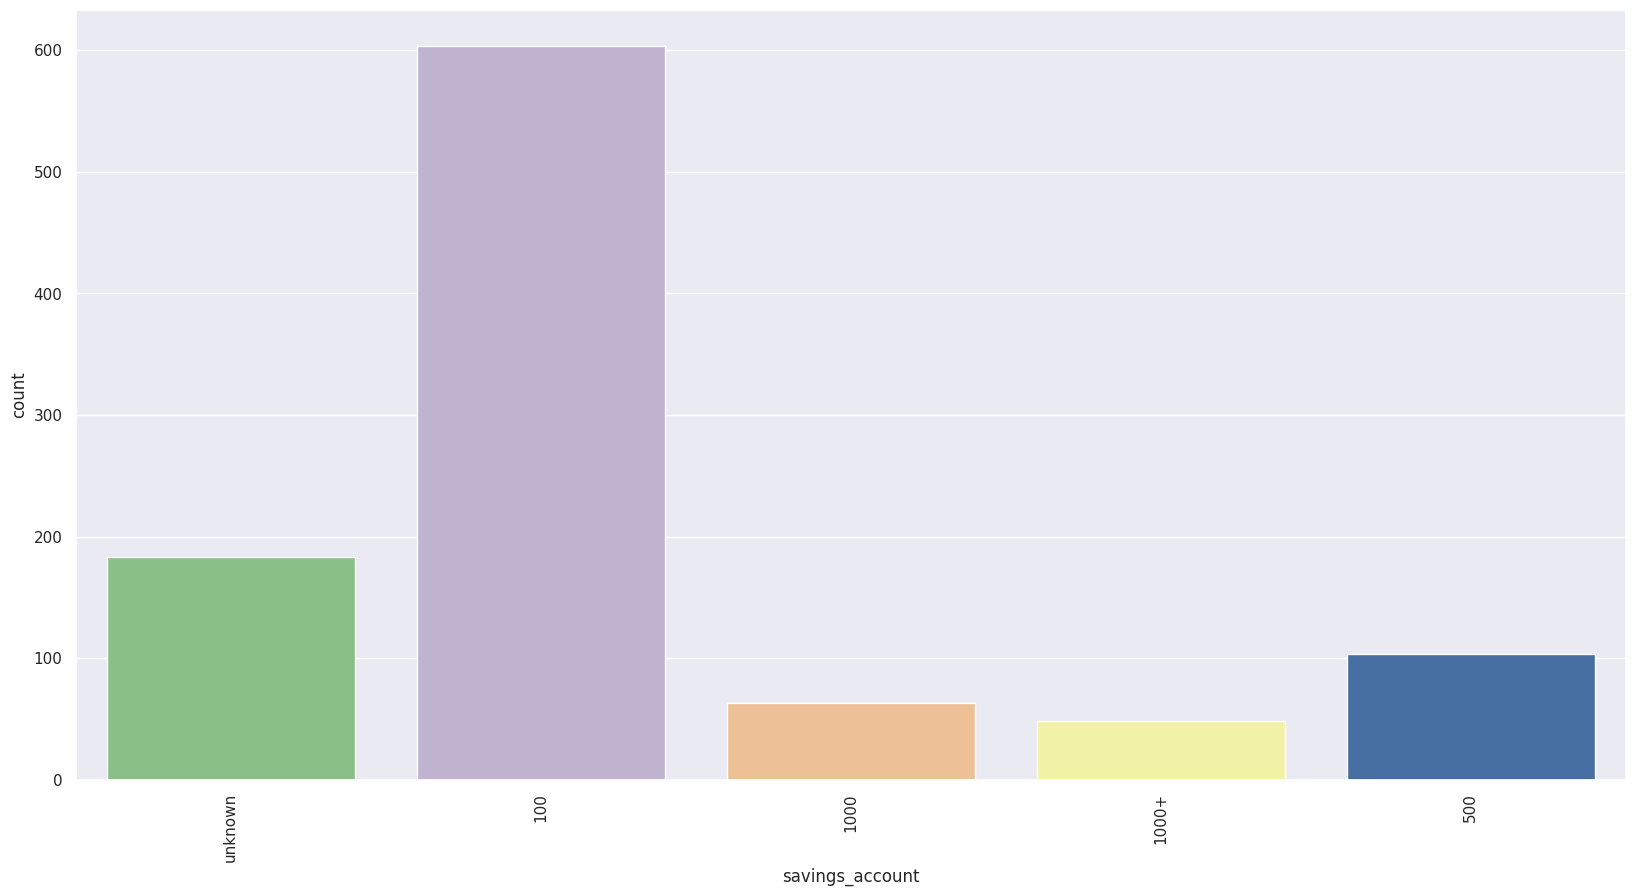

/tmp/ipython-input-1573138527.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,


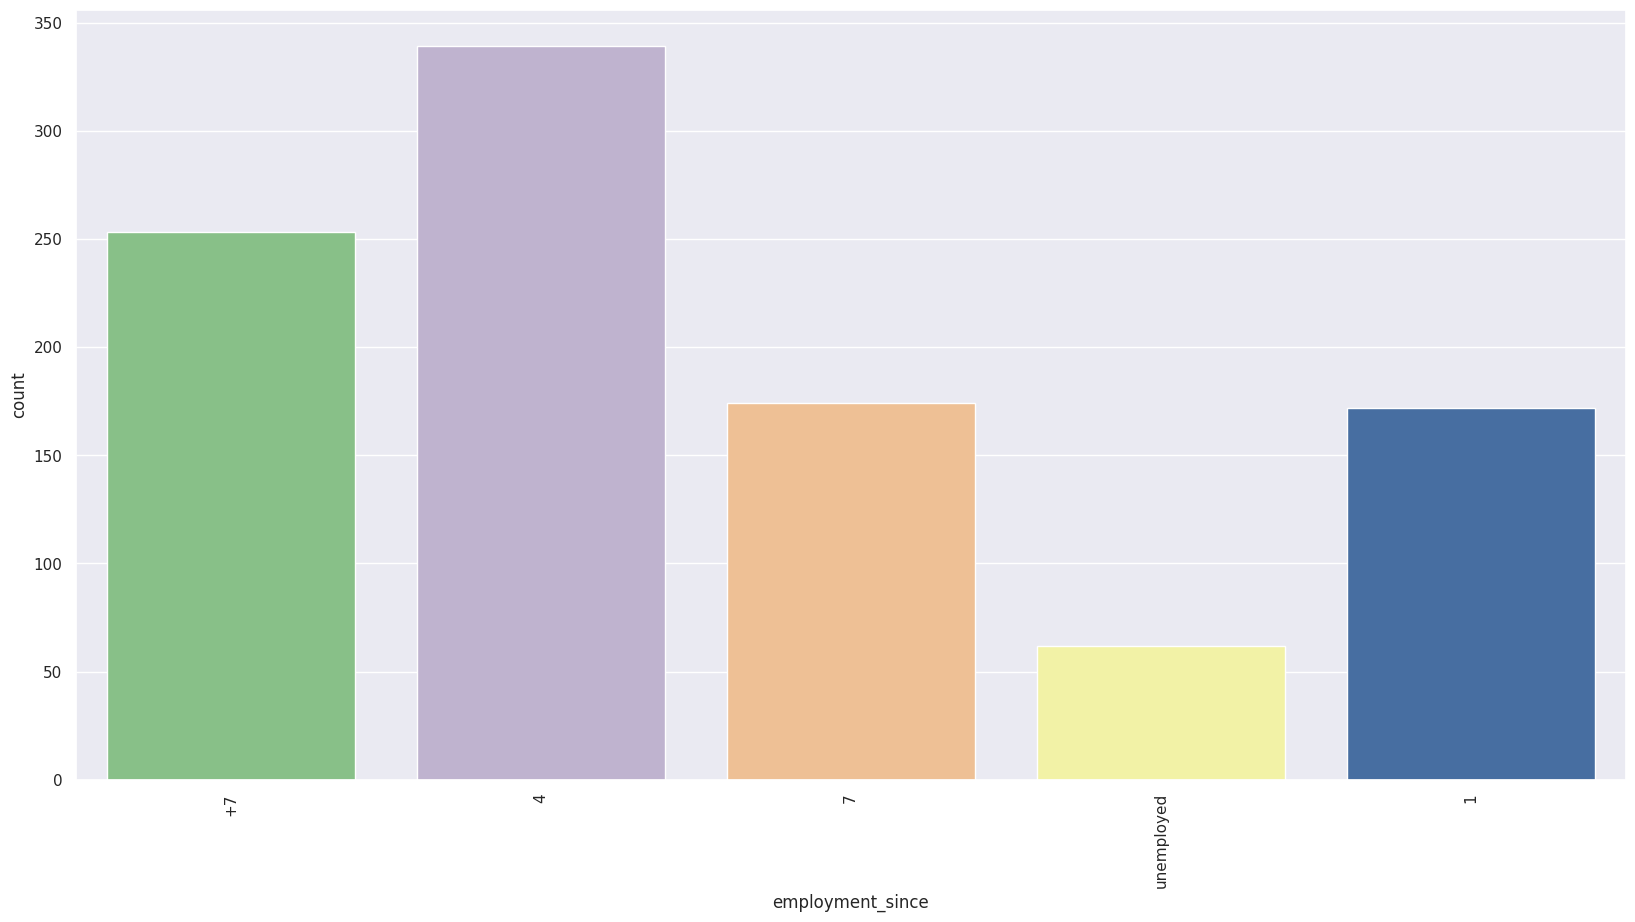

/tmp/ipython-input-1573138527.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,


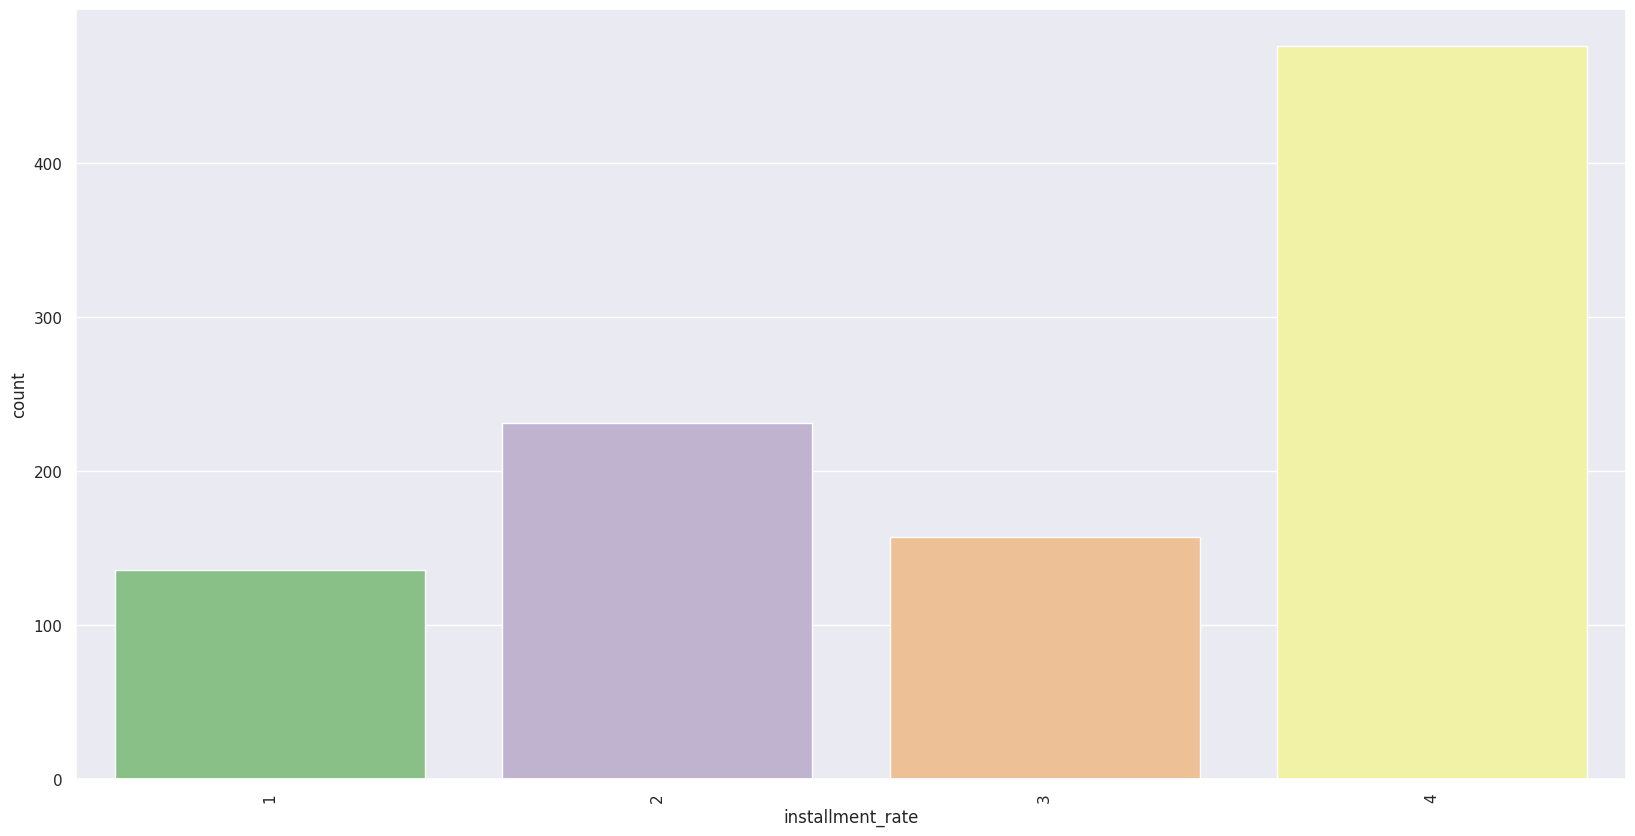

/tmp/ipython-input-1573138527.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,


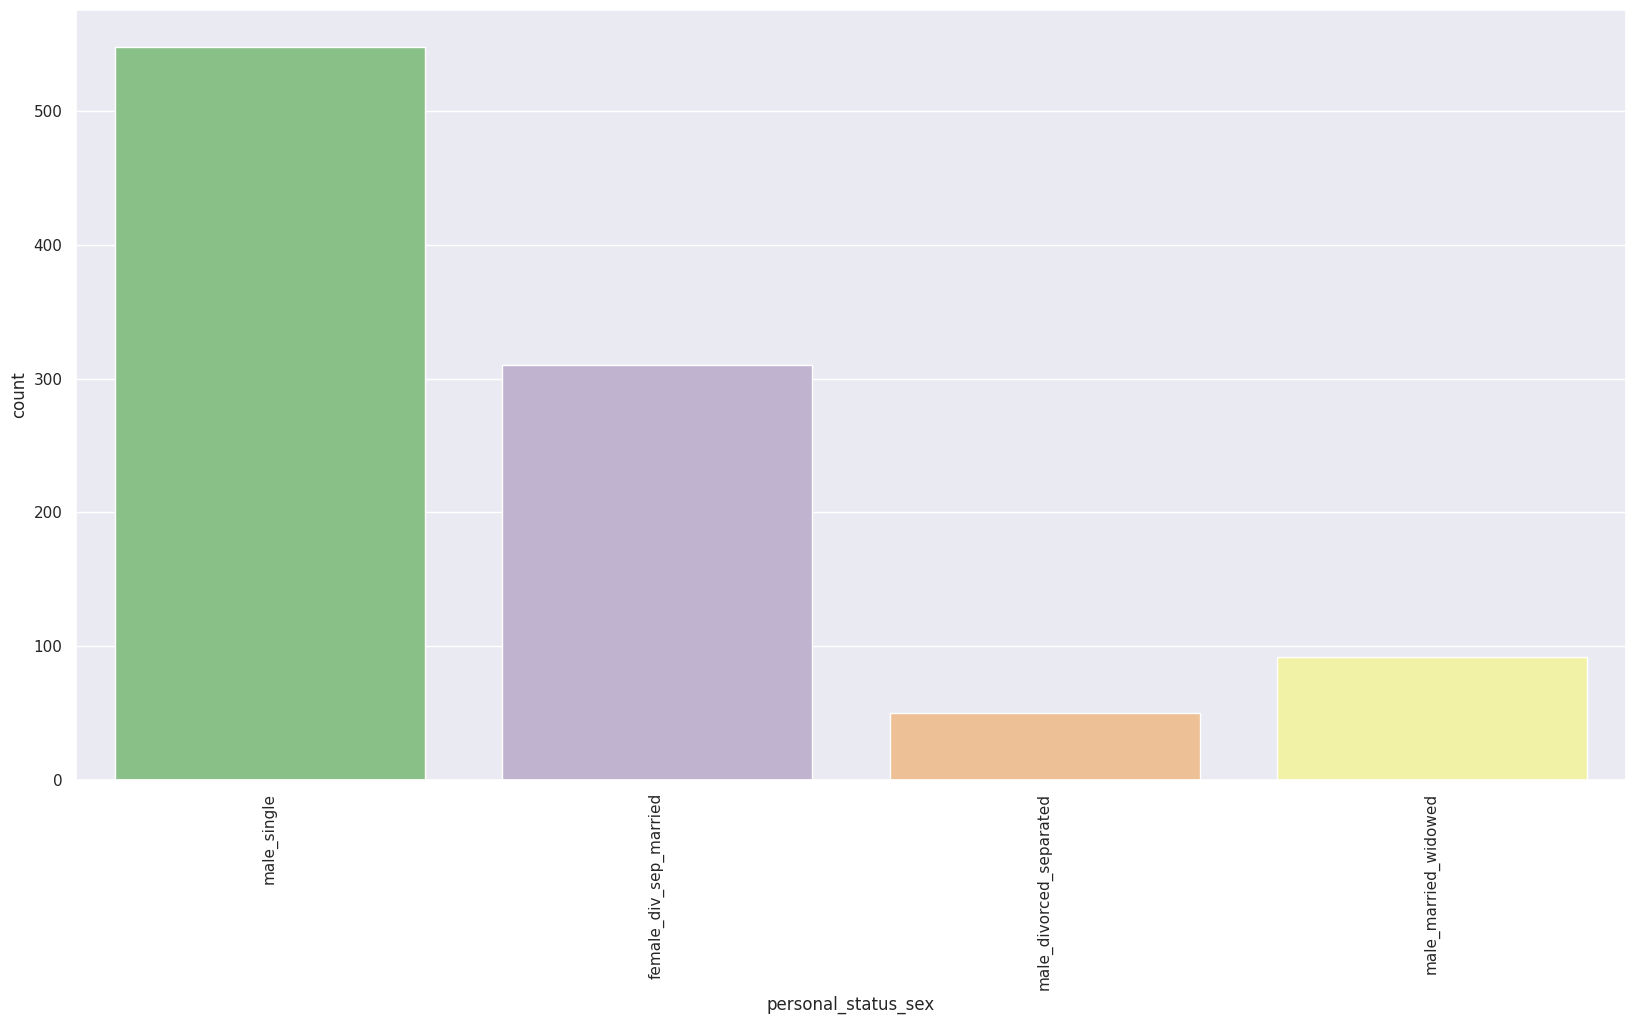

/tmp/ipython-input-1573138527.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,


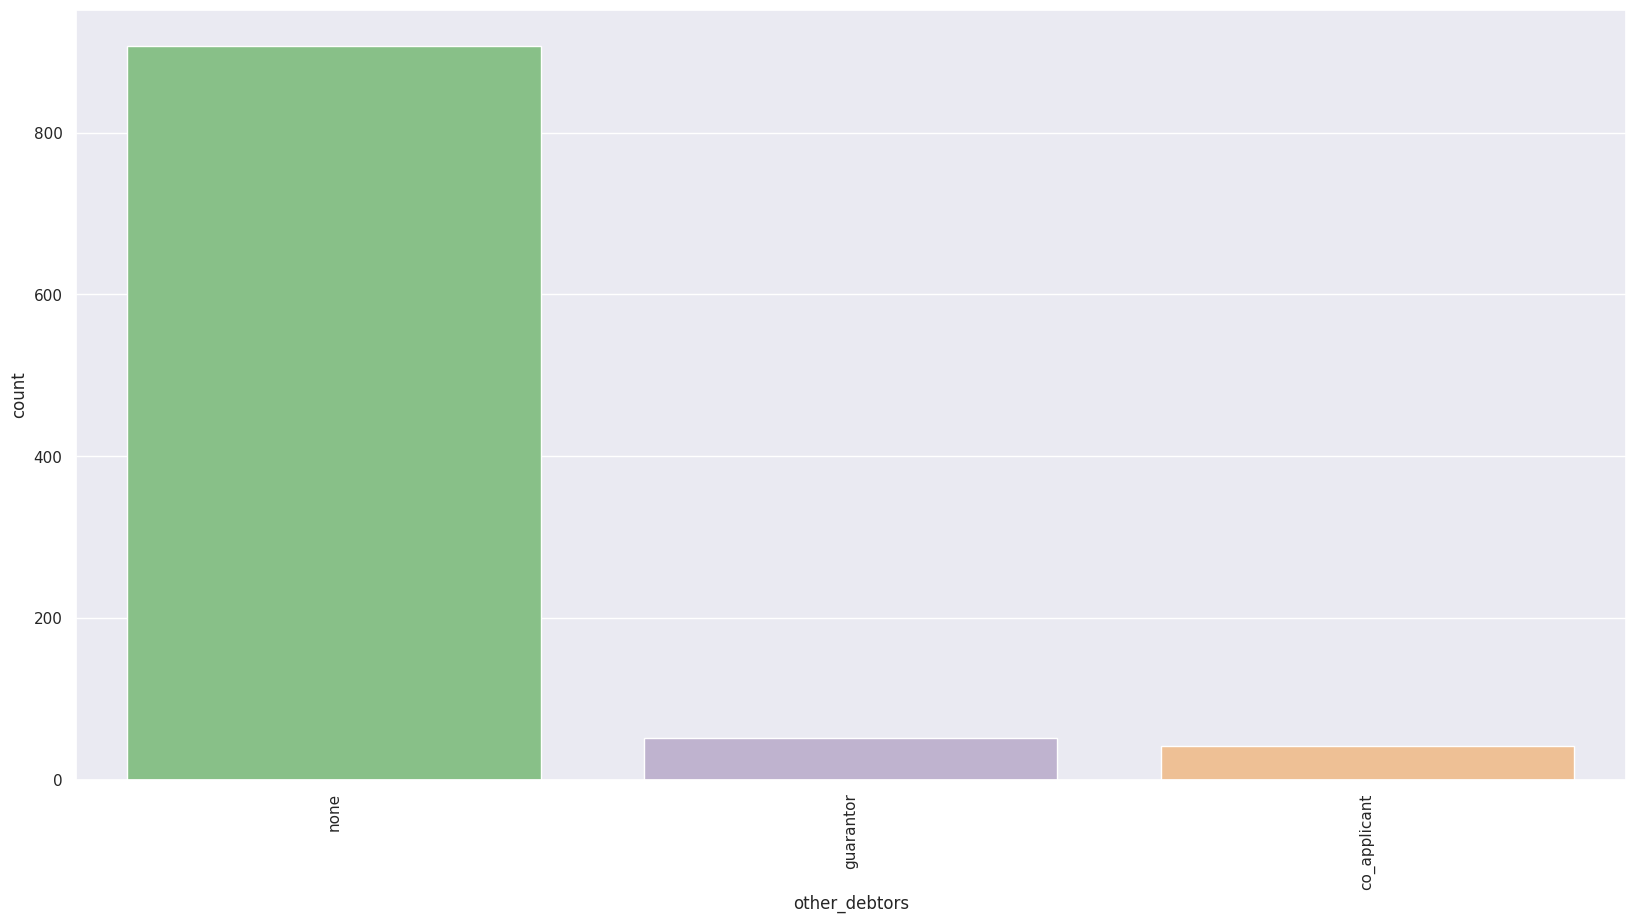

/tmp/ipython-input-1573138527.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,


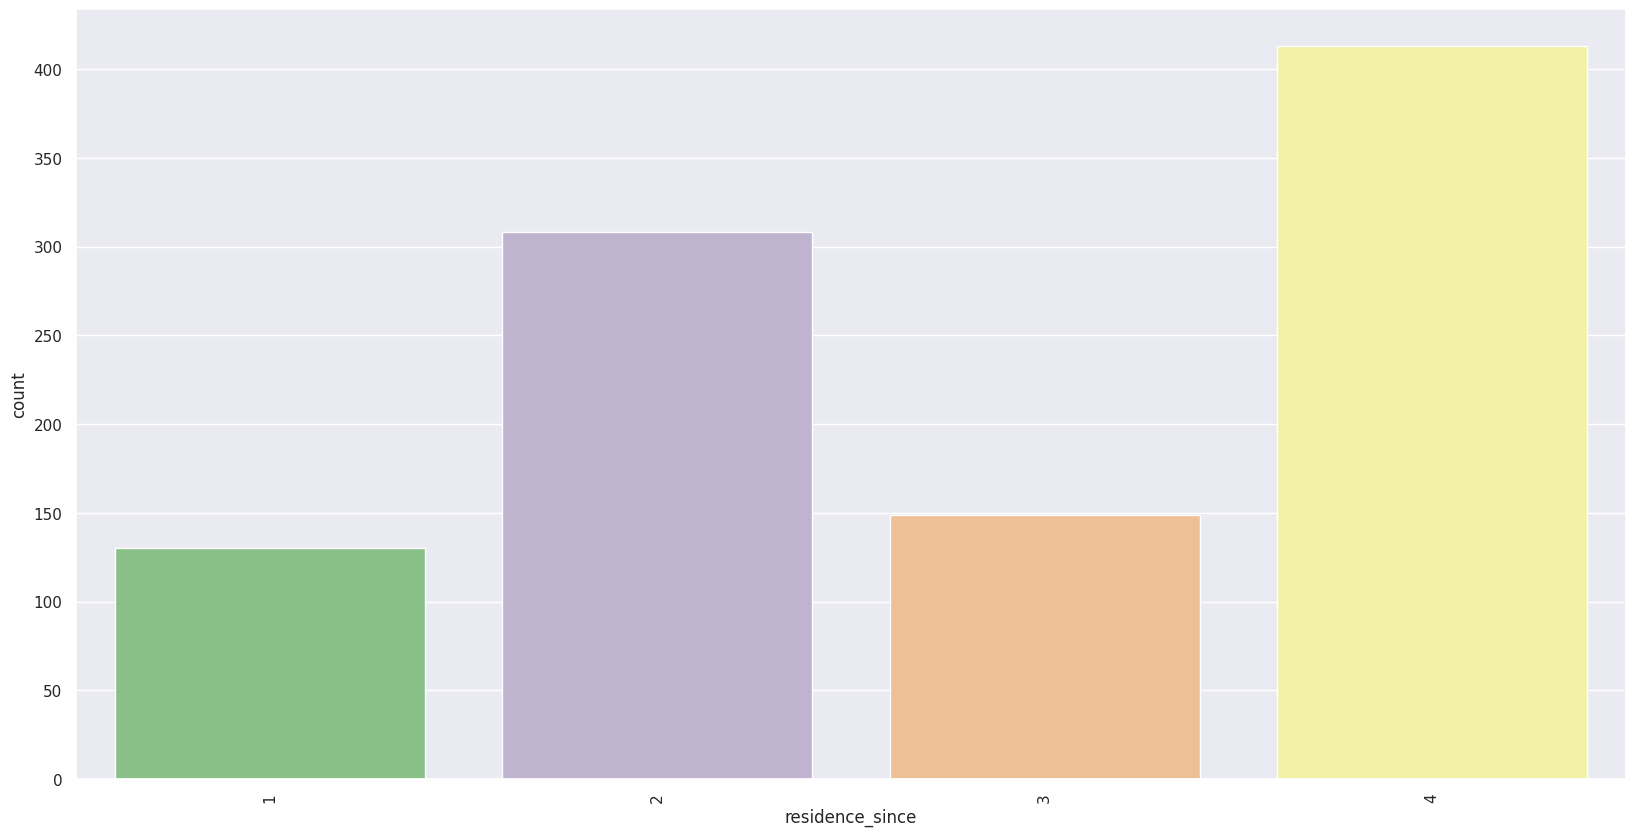

/tmp/ipython-input-1573138527.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,


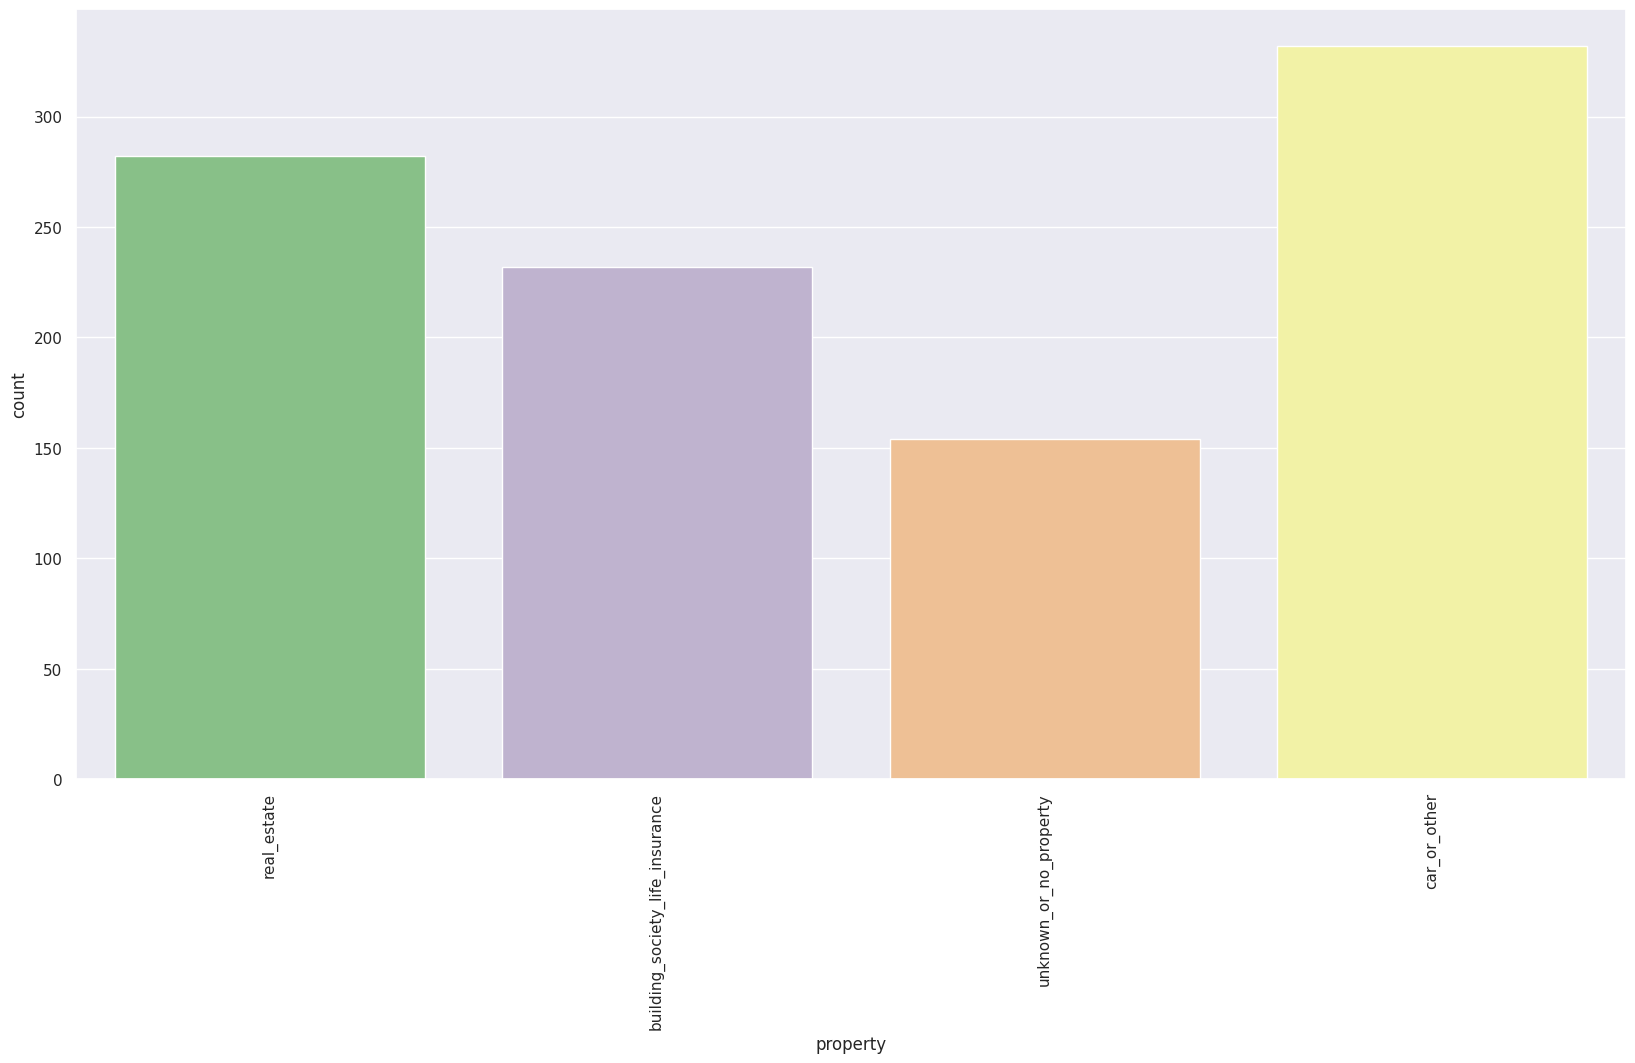

/tmp/ipython-input-1573138527.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,


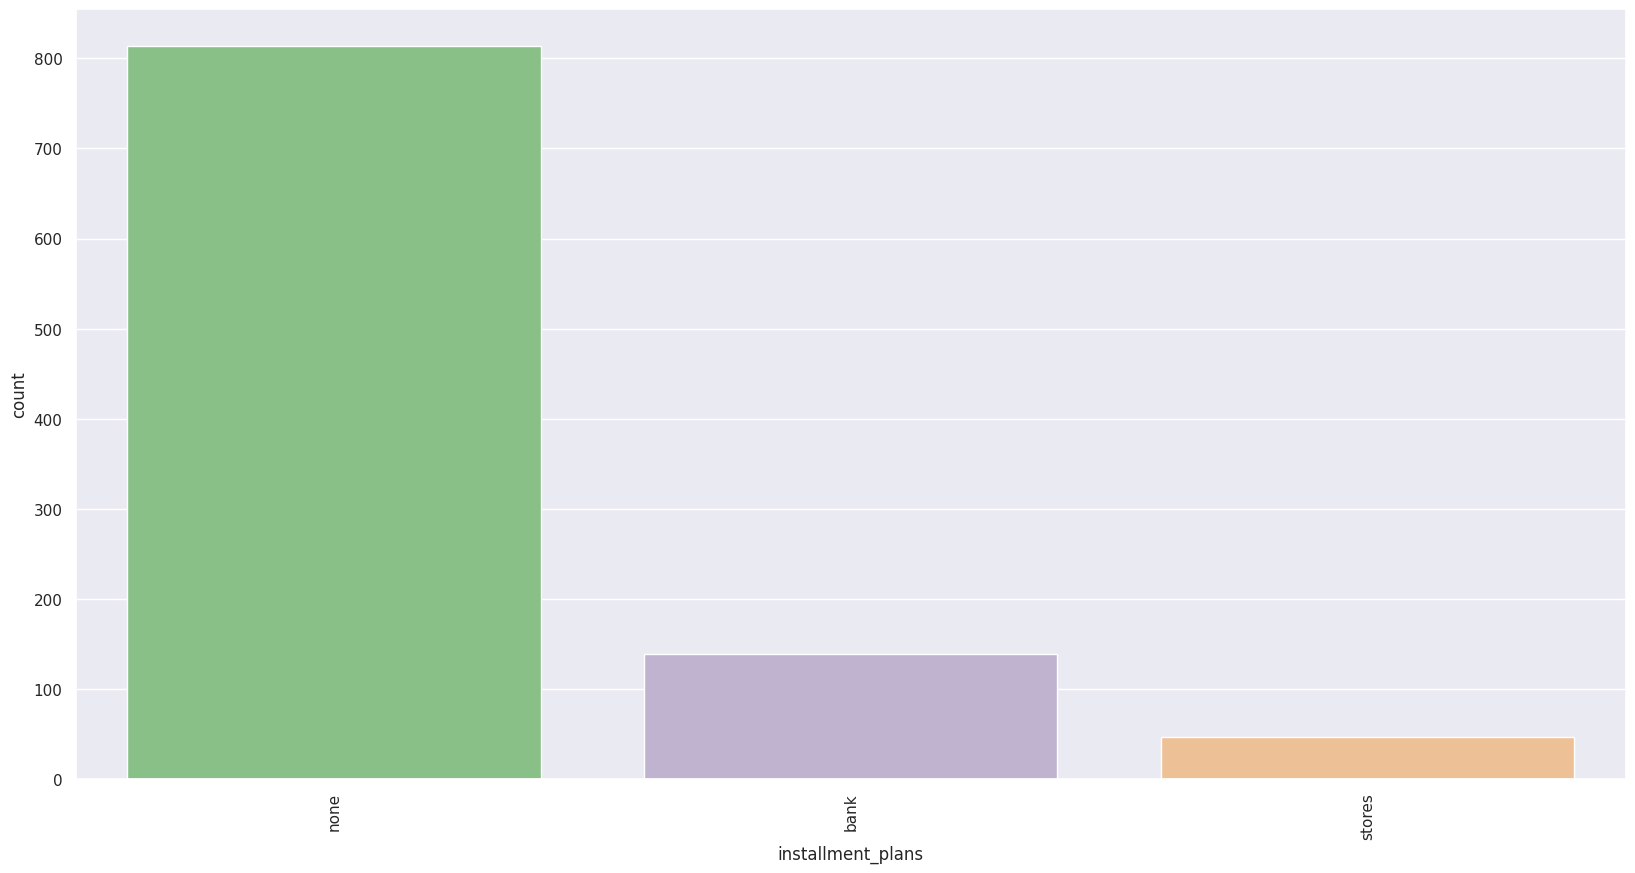

/tmp/ipython-input-1573138527.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,


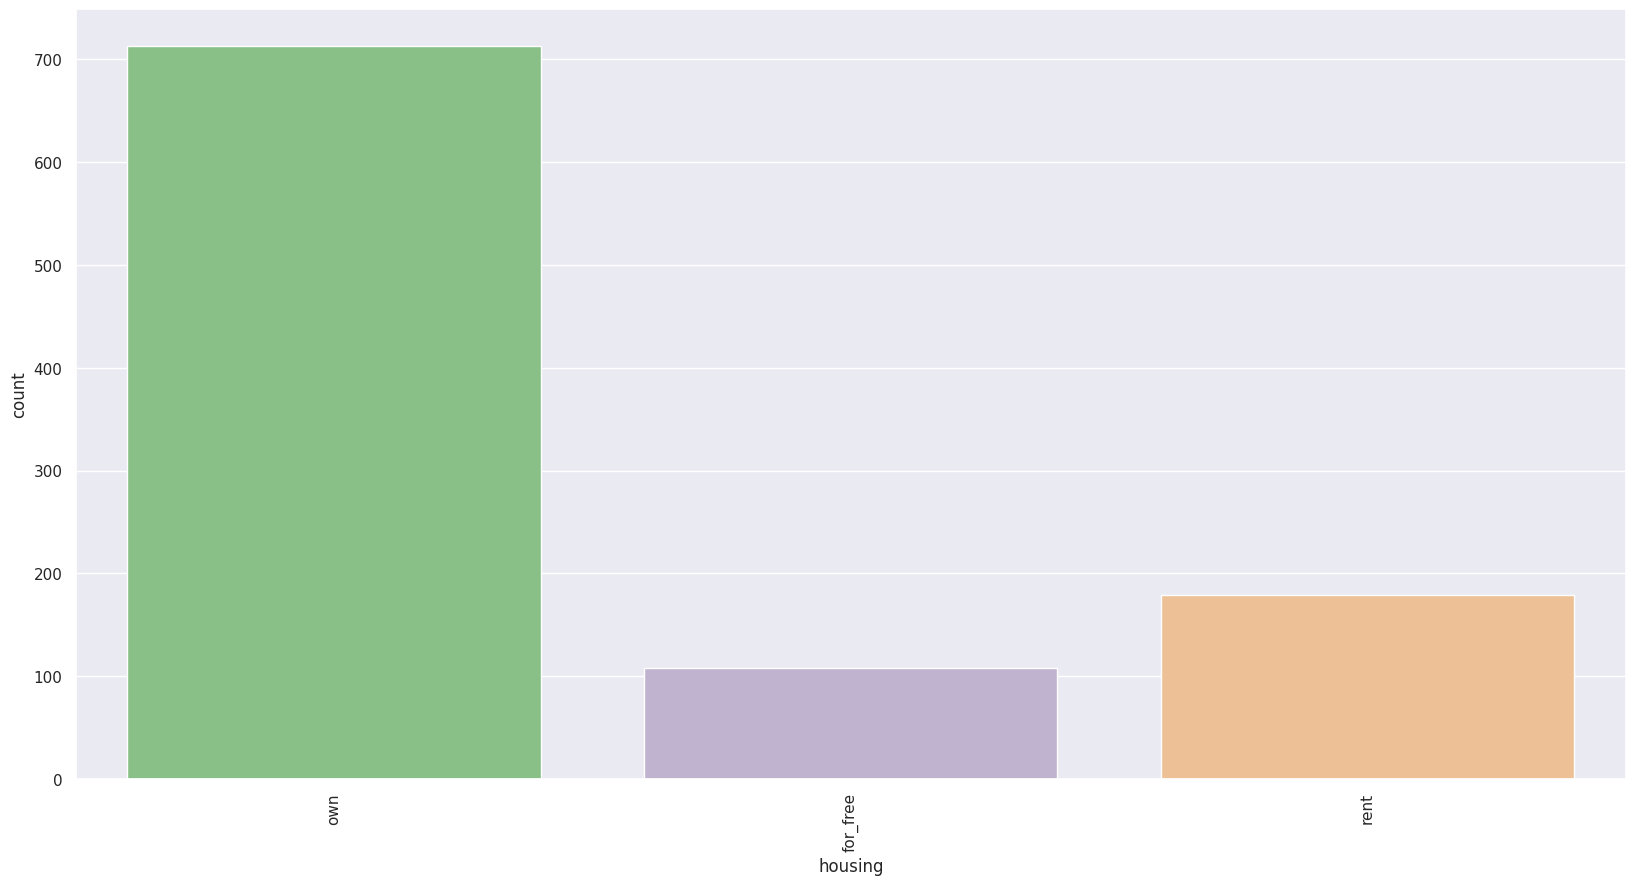

/tmp/ipython-input-1573138527.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,


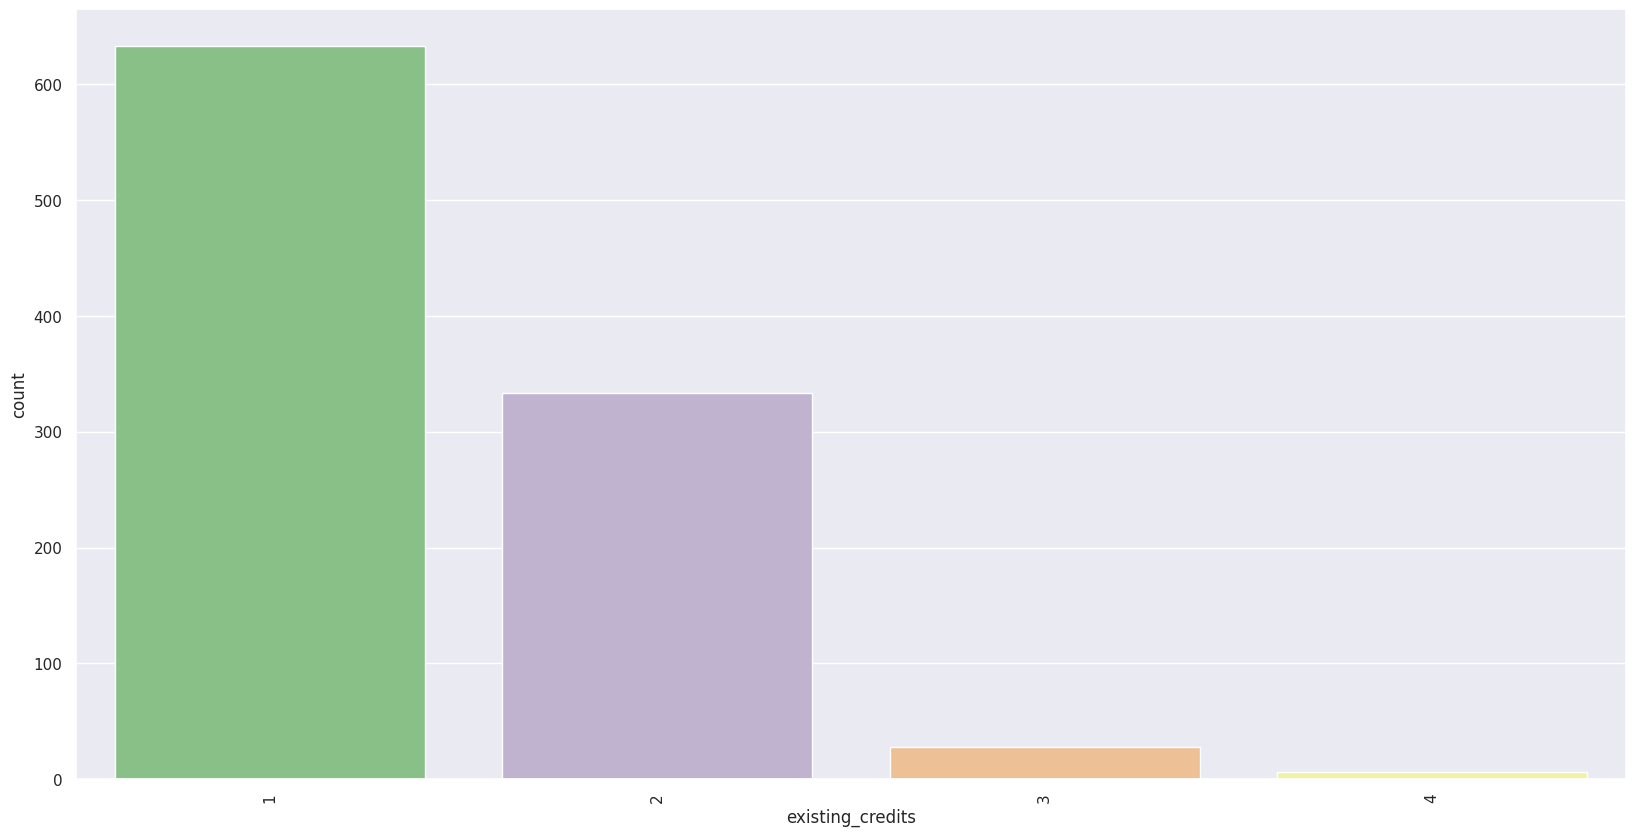

/tmp/ipython-input-1573138527.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,


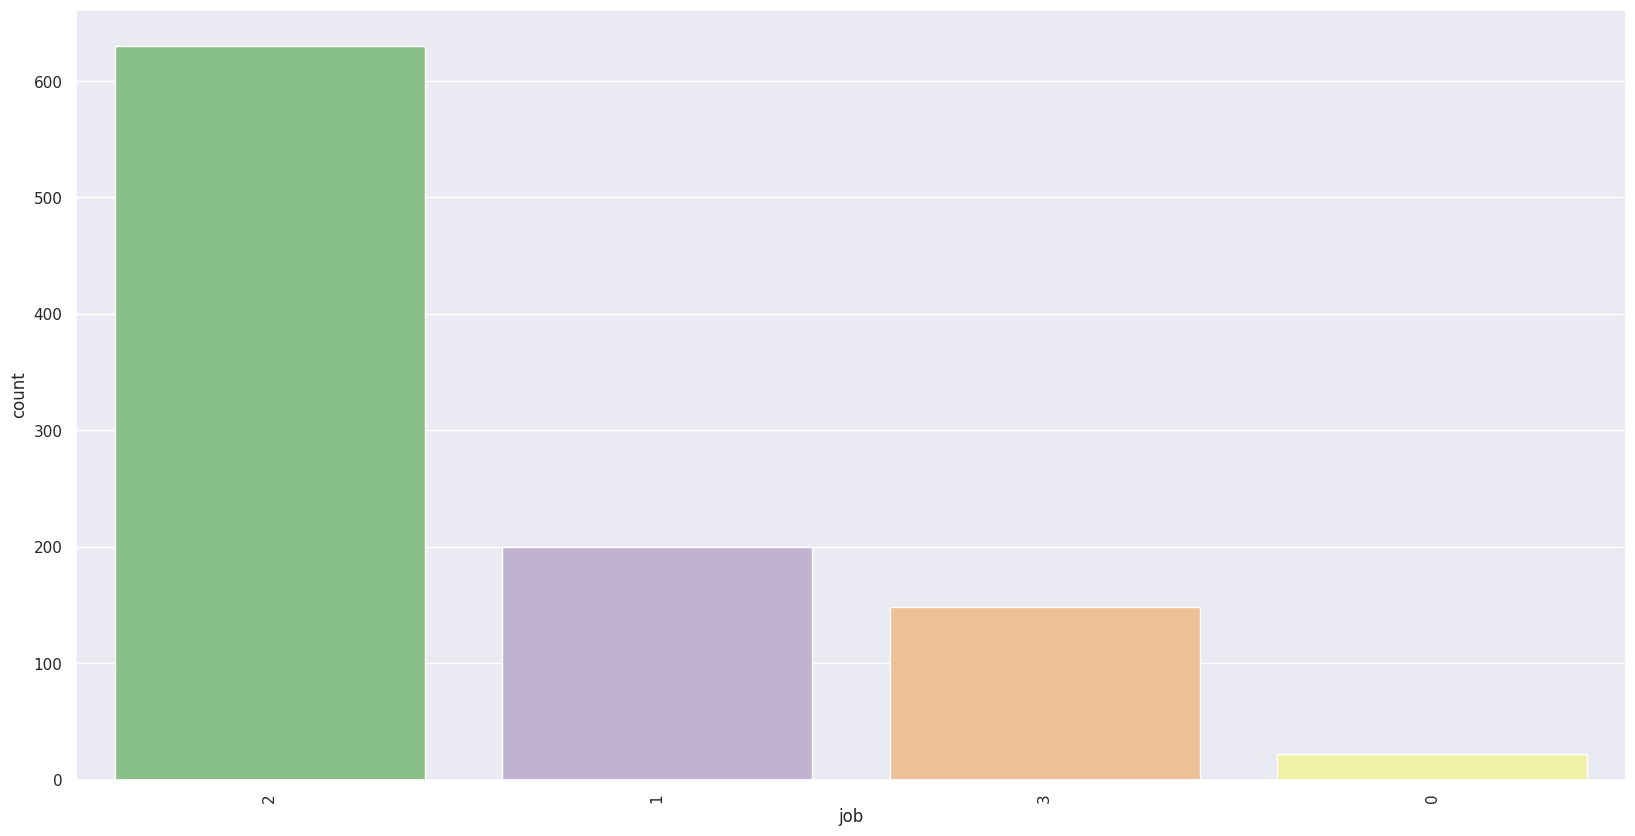

/tmp/ipython-input-1573138527.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,


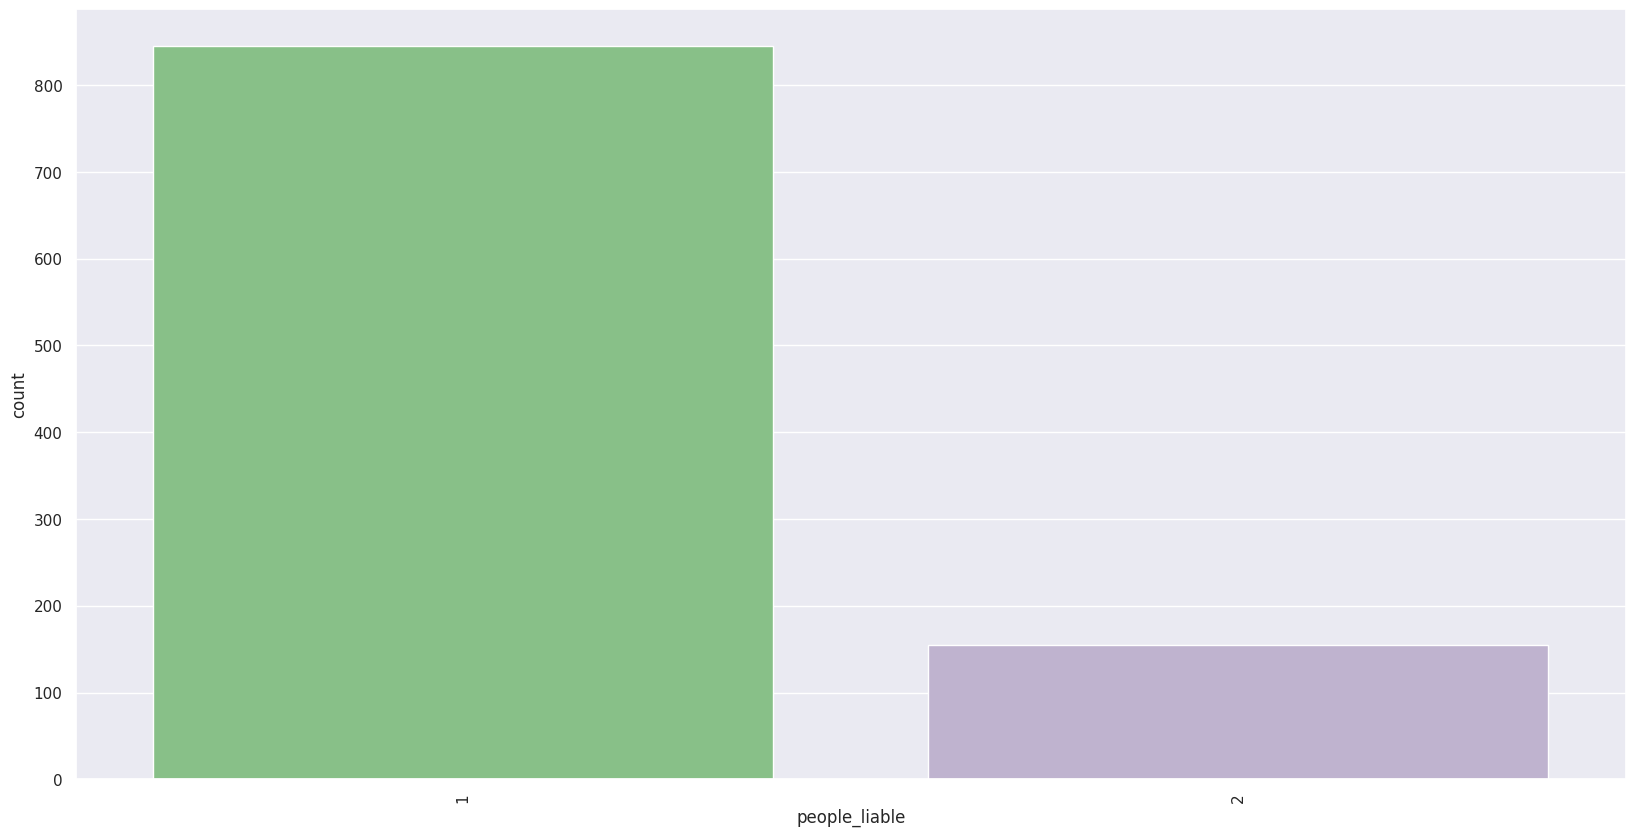

/tmp/ipython-input-1573138527.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,


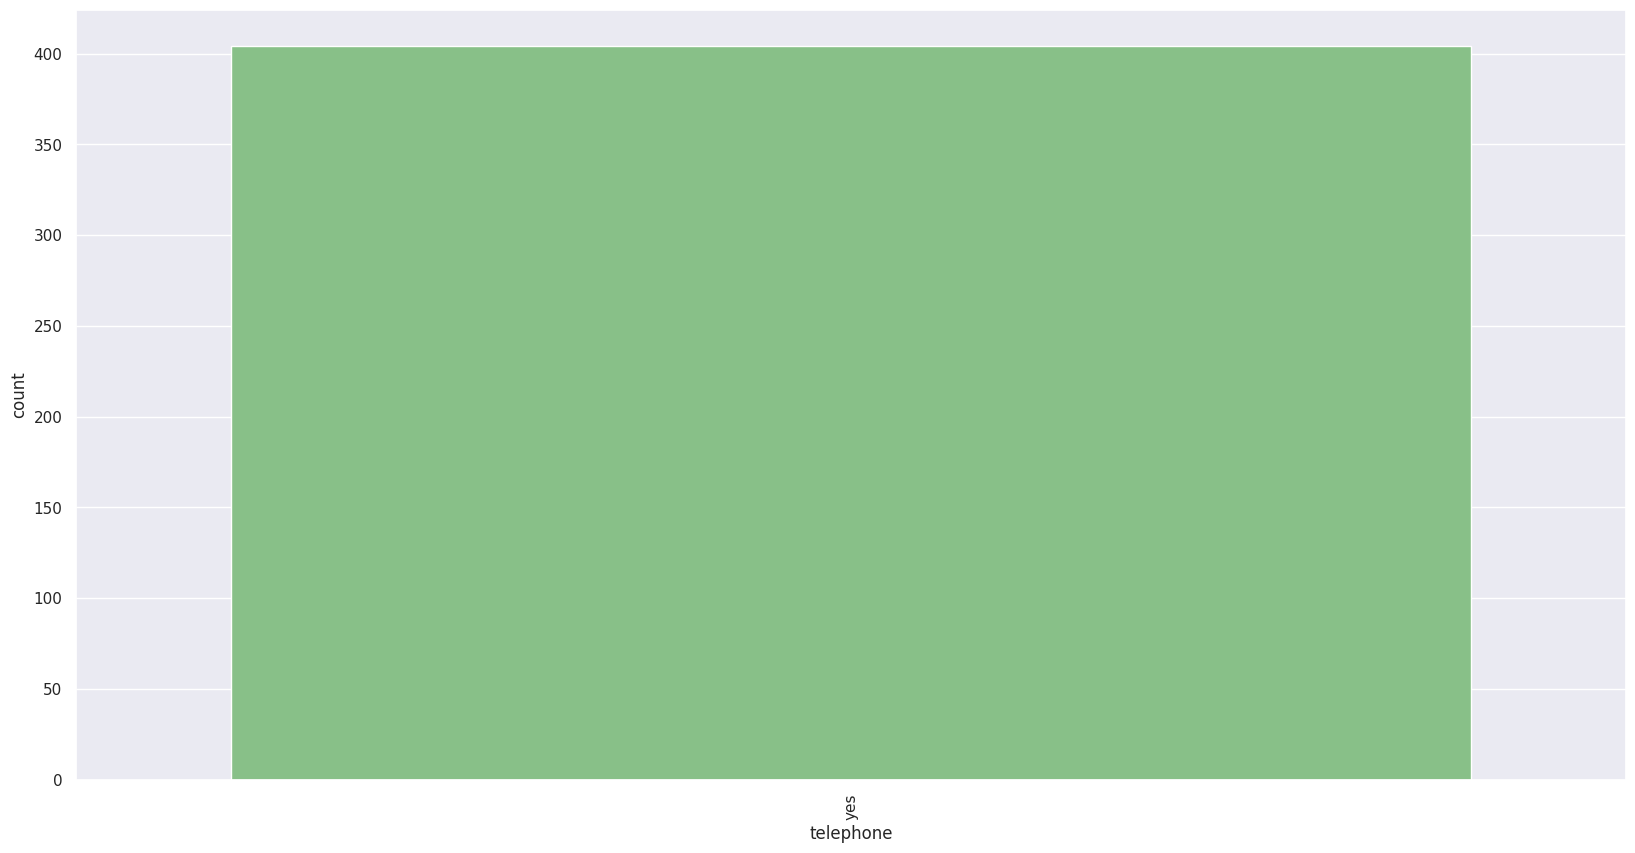

/tmp/ipython-input-1573138527.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,


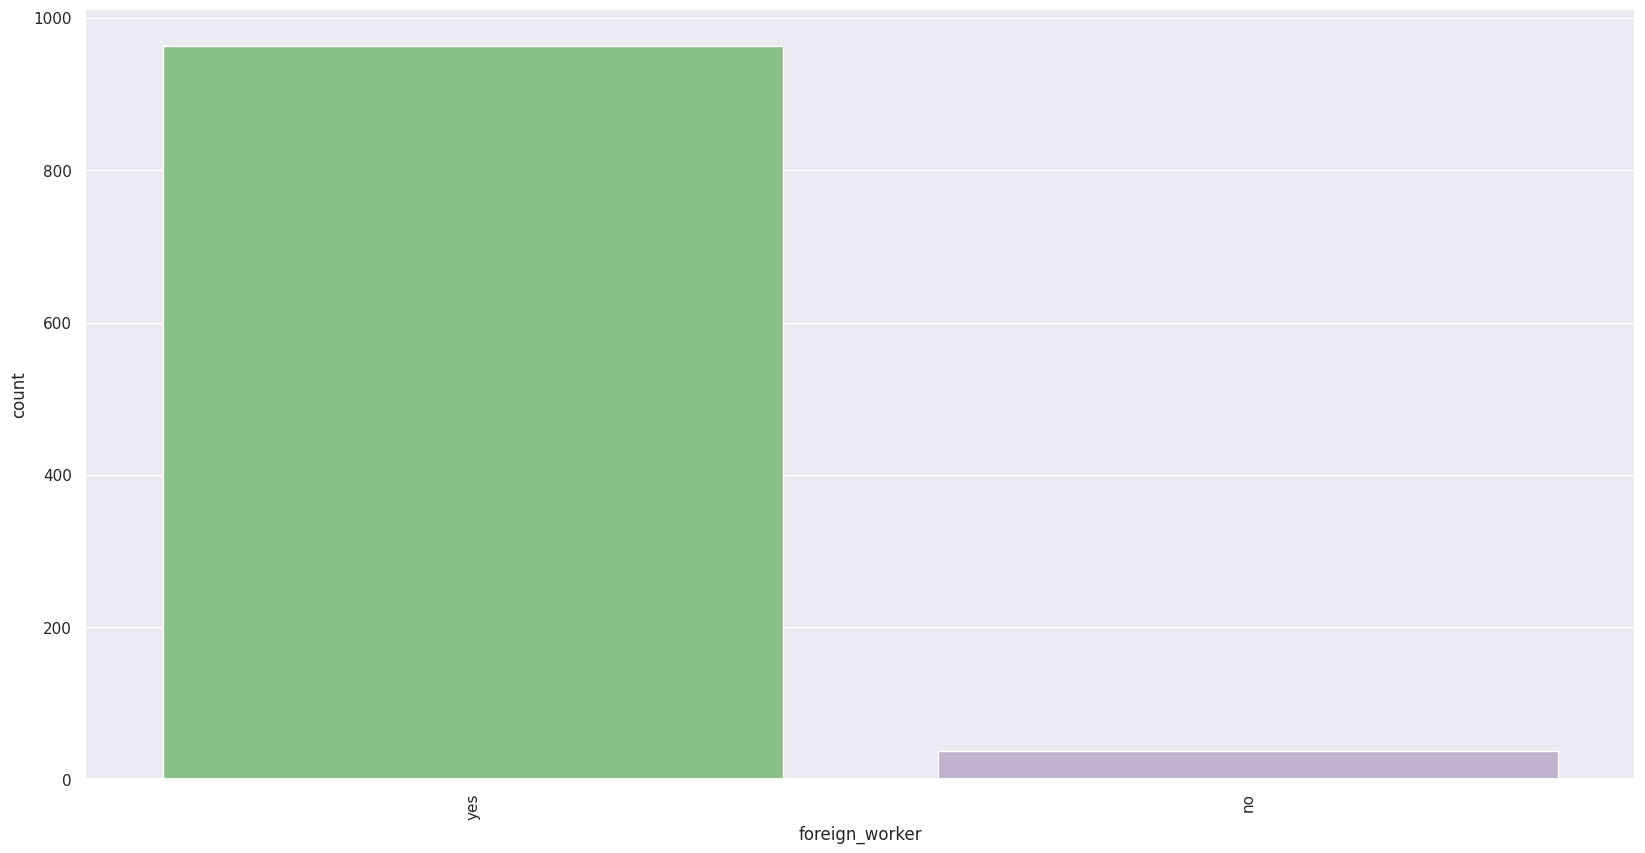

In [162]:
for i in categoric:
    sns.countplot(data=df,
                       x=df[i],
                       palette='Accent')
    plt.xticks(rotation=90)
    plt.show()

In [163]:
df = df.drop("telephone", axis=1)

In [164]:
df = df.drop("foreign_worker", axis=1)

In [165]:
df = df.drop("people_liable", axis=1)

In [166]:
df = df.drop("other_debtors", axis=1)

Text(0.5, 1.0, 'Correlation')

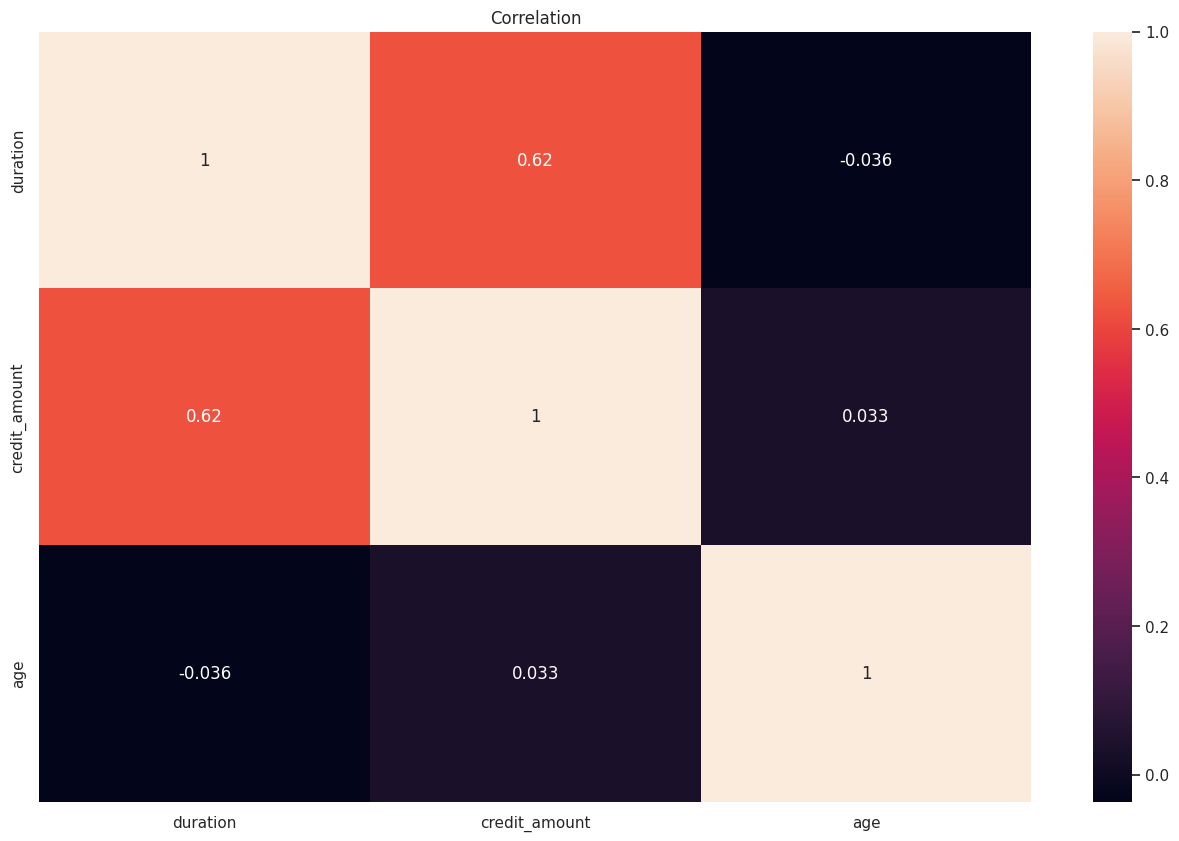

In [167]:
plt.figure(figsize=(16,10))
sns.heatmap(uncategorical.corr(), annot= True)
plt.title('Correlation')

In [168]:
df['purpose'].value_counts()


,count
purpose,
radio_tv,280
new_car,234
furniture_equipment,181
used_car,103
business,97
education,50
repairs,22
domestic_appliances,12
others,12


In [169]:

top_6 = df['purpose'].value_counts().nlargest(6).index


df['purpose'] = df['purpose'].apply(lambda x: x if x in top_6 else 'others')


In [170]:
df['purpose'].value_counts()

,count
purpose,
radio_tv,280
new_car,234
furniture_equipment,181
used_car,103
business,97
others,55
education,50


In [171]:
# prompt: df['personal_status_sex'].rename(columns={'personal_status_sex':'sex'})

df = df.rename(columns={'personal_status_sex':'sex'})

In [172]:

categoric = ['checking_account', 'credit_history', 'purpose', 'savings_account', 'employment_since', 'sex', 'residence_since', 'property', 'installment_plans', 'housing', 'existing_credits', 'job']

In [173]:
df['sex'].value_counts()

,count
sex,
male_single,548
female_div_sep_married,310
male_married_widowed,92
male_divorced_separated,50


In [174]:
# prompt: sex_ = df['sex'].("male_single","male_married_widowed","male_divorced_separated")
# df['sex'] = df['sex'].apply(lambda x: x if x in sex_ 'Male' else 'Female')

sex_categories = ["male_single", "male_married_widowed", "male_divorced_separated"]
df['sex'] = df['sex'].apply(lambda x: 'Male' if x in sex_categories else 'Female')

/tmp/ipython-input-1573138527.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,


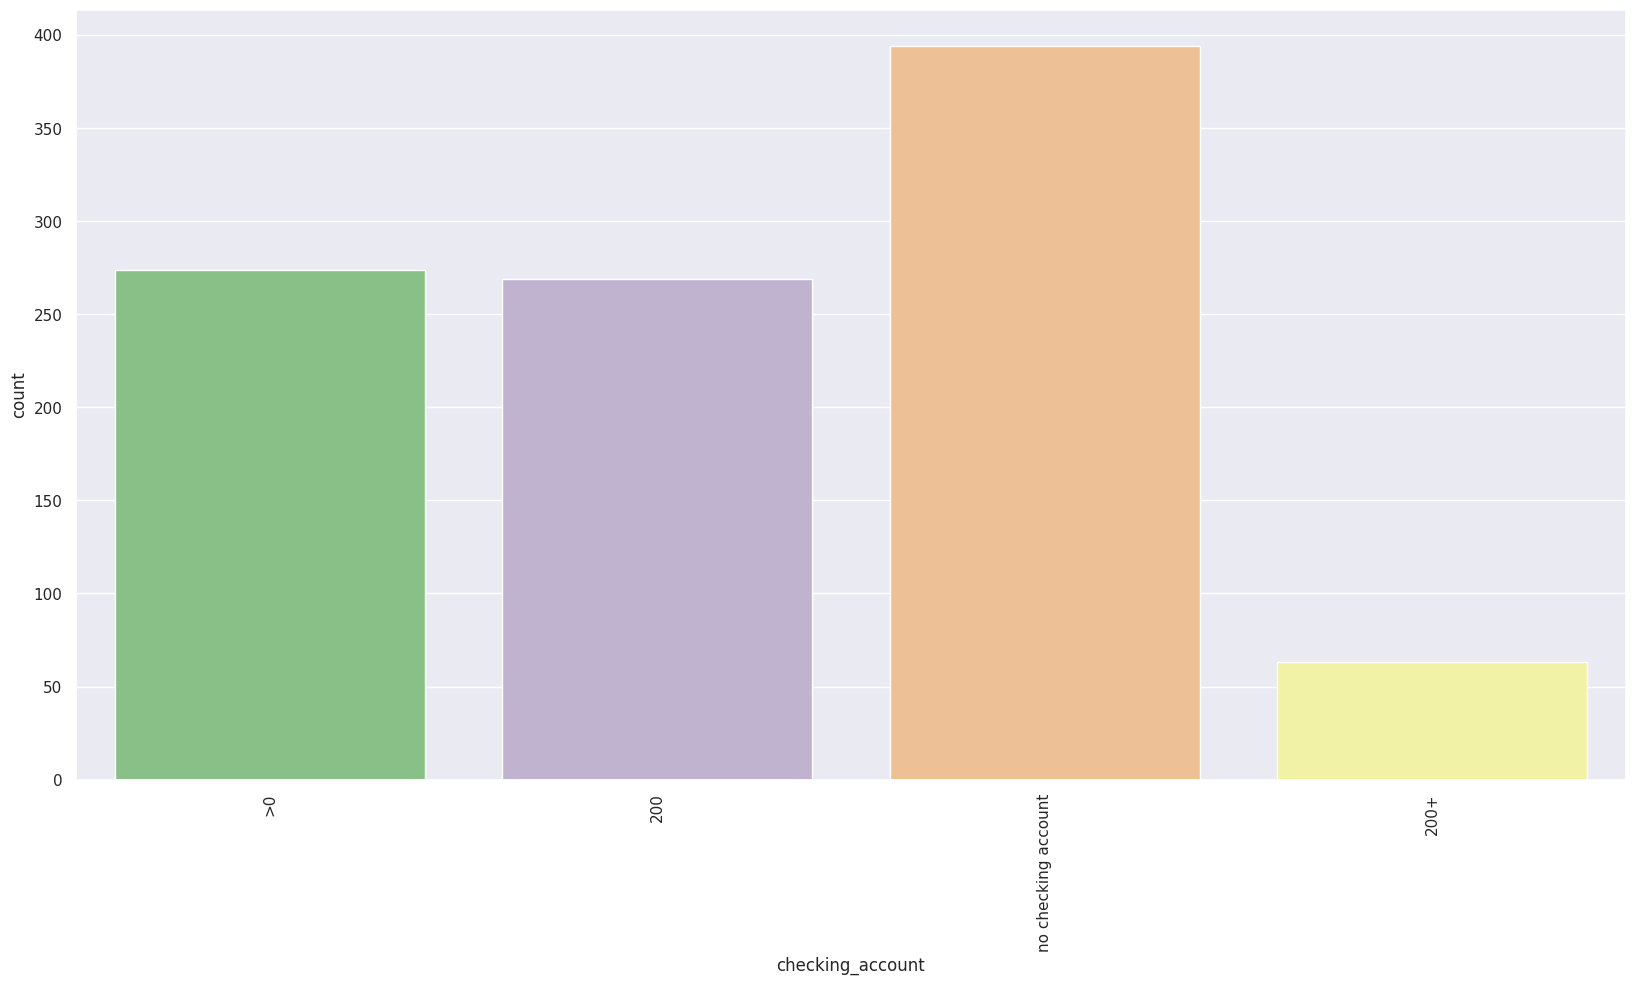

/tmp/ipython-input-1573138527.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,


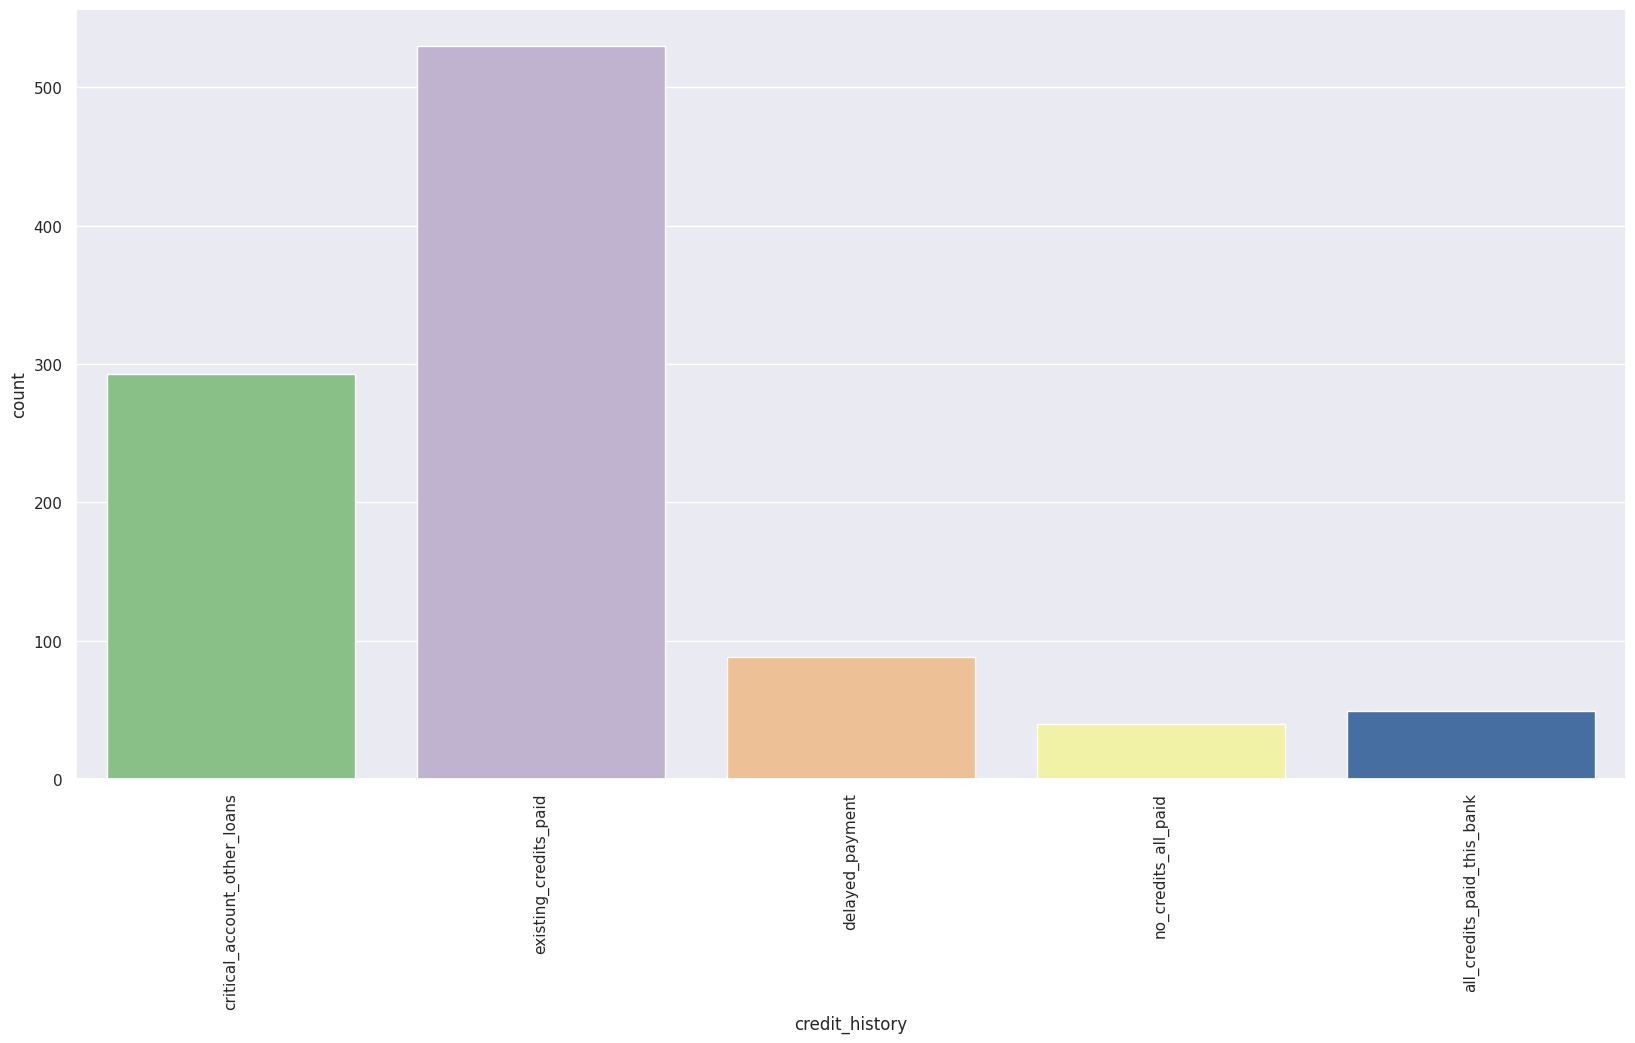

/tmp/ipython-input-1573138527.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,


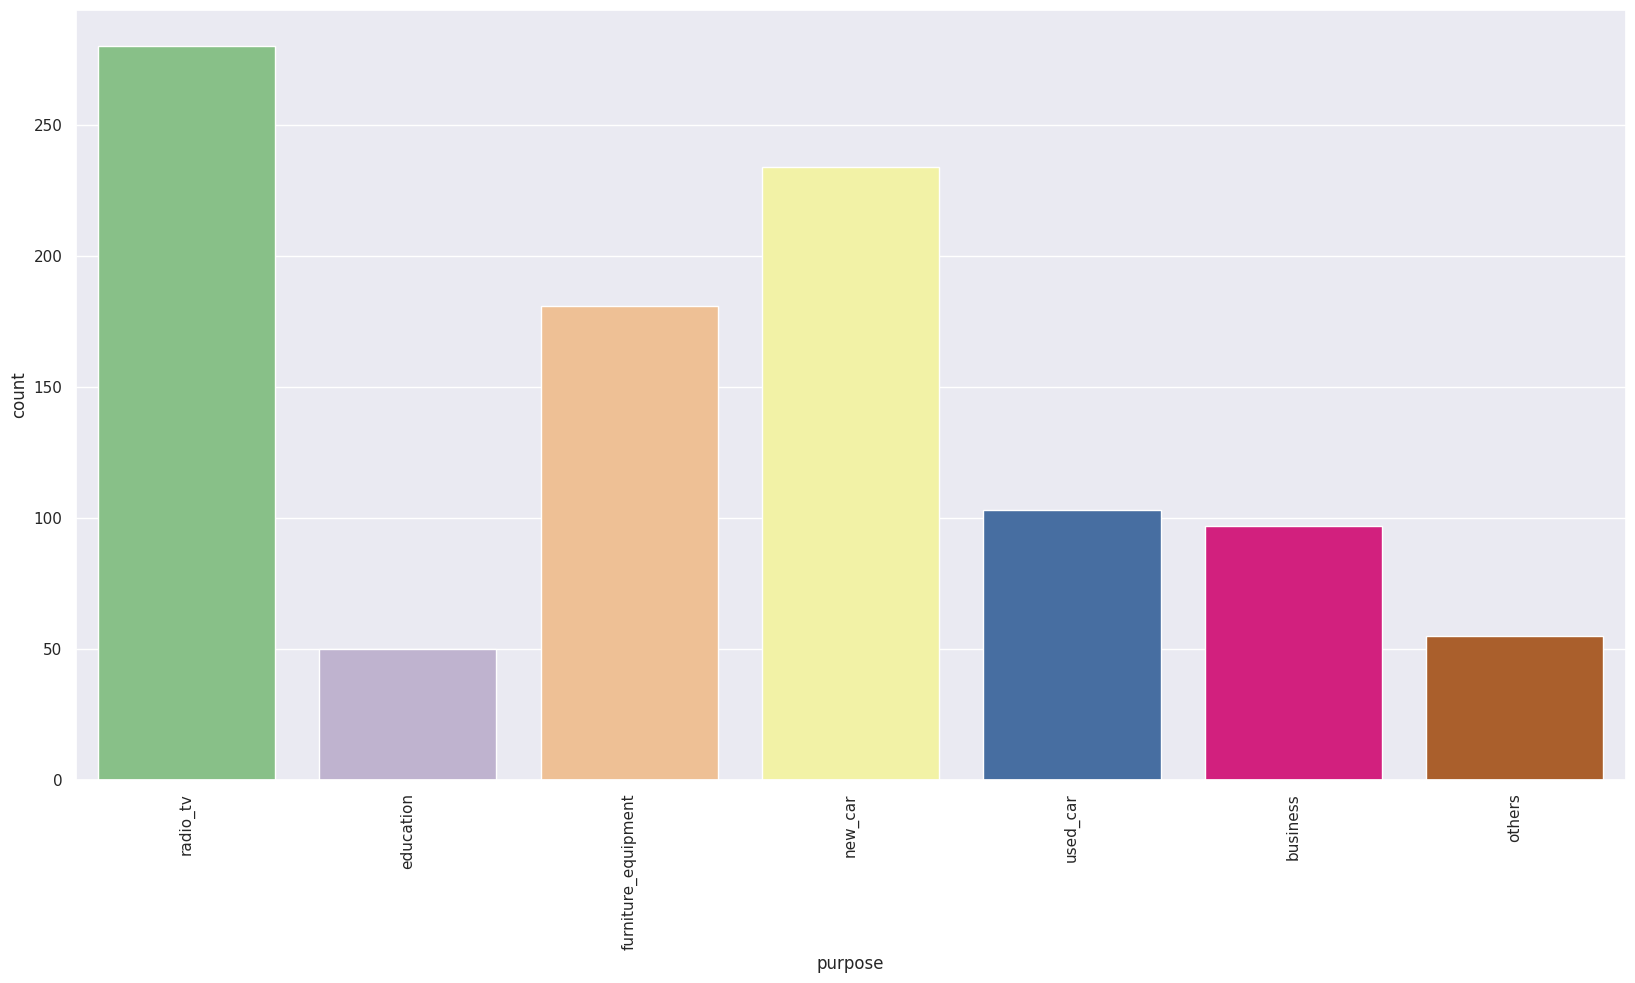

/tmp/ipython-input-1573138527.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,


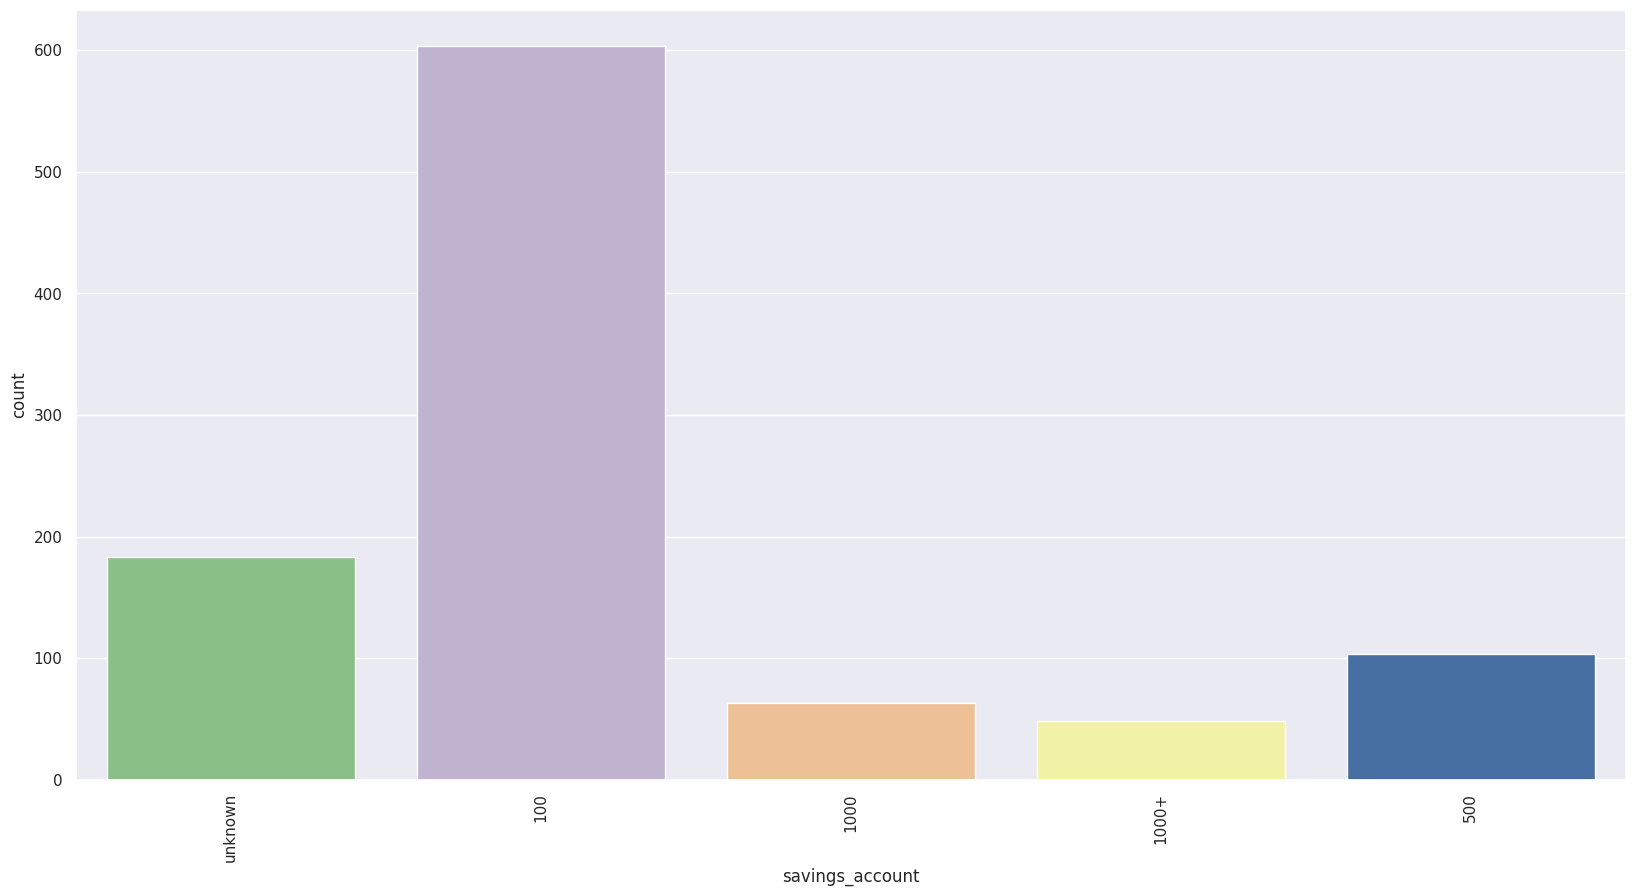

/tmp/ipython-input-1573138527.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,


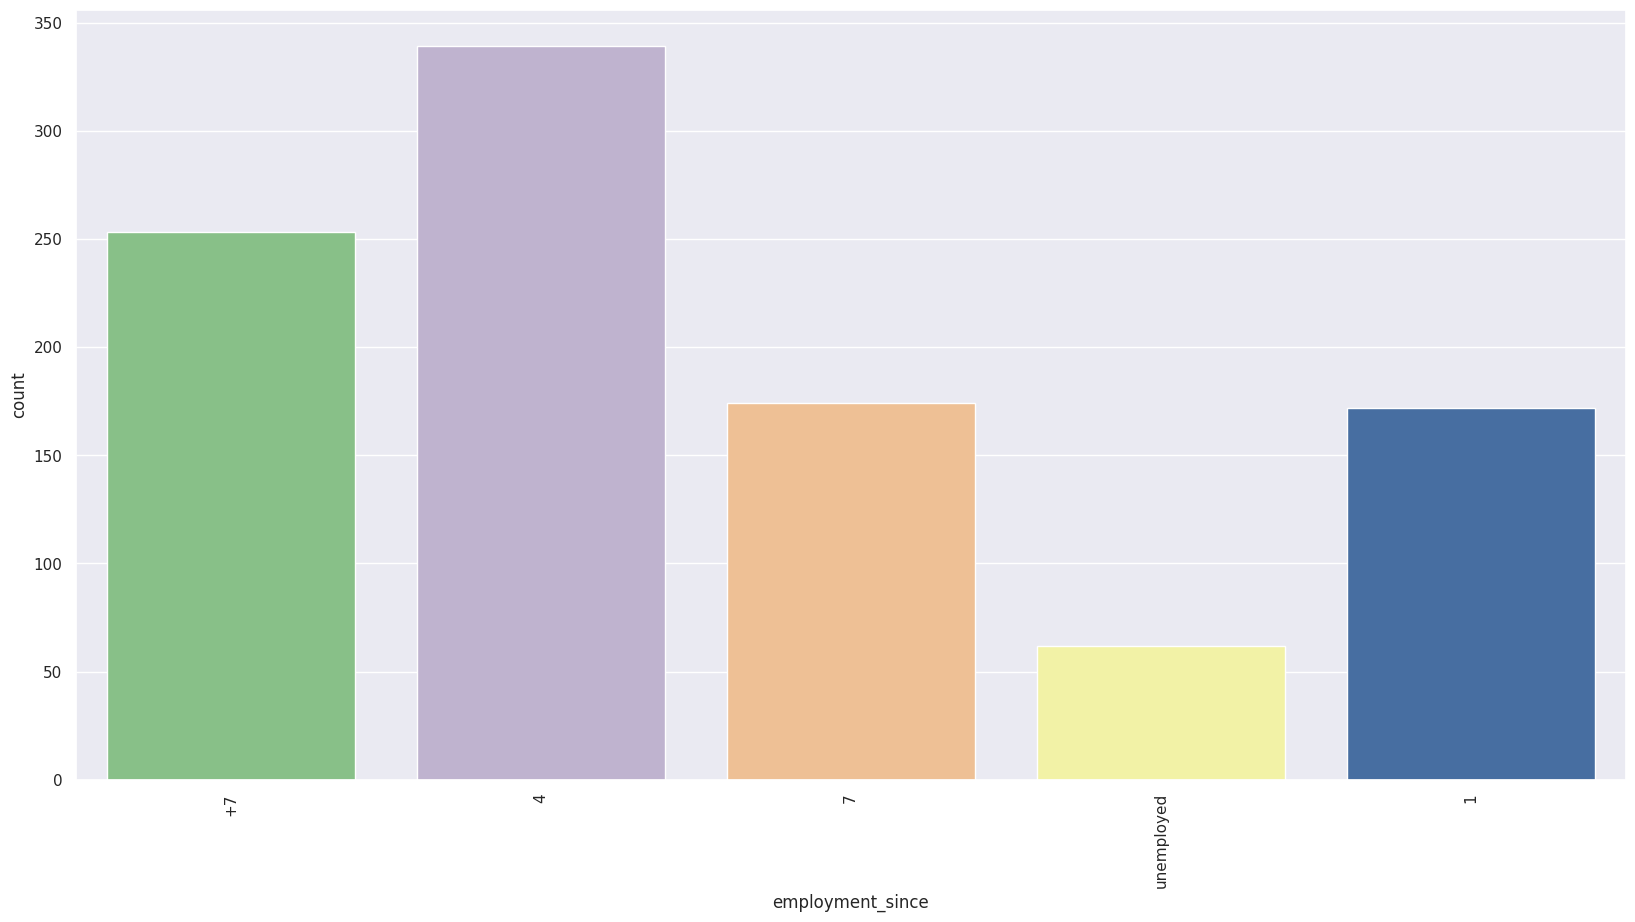

/tmp/ipython-input-1573138527.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,


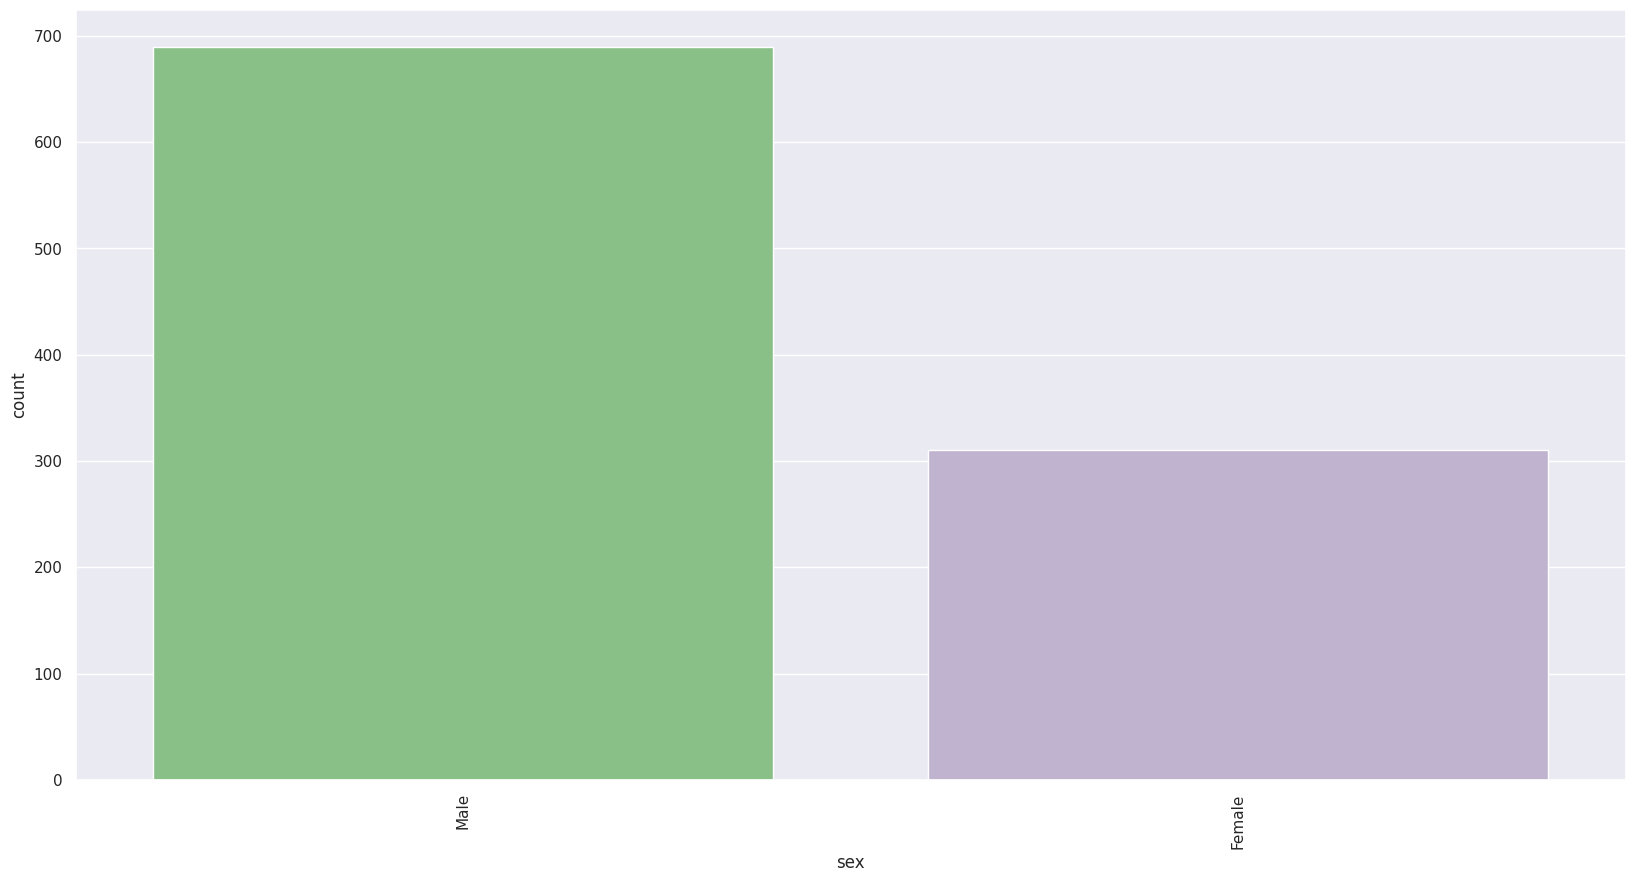

/tmp/ipython-input-1573138527.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,


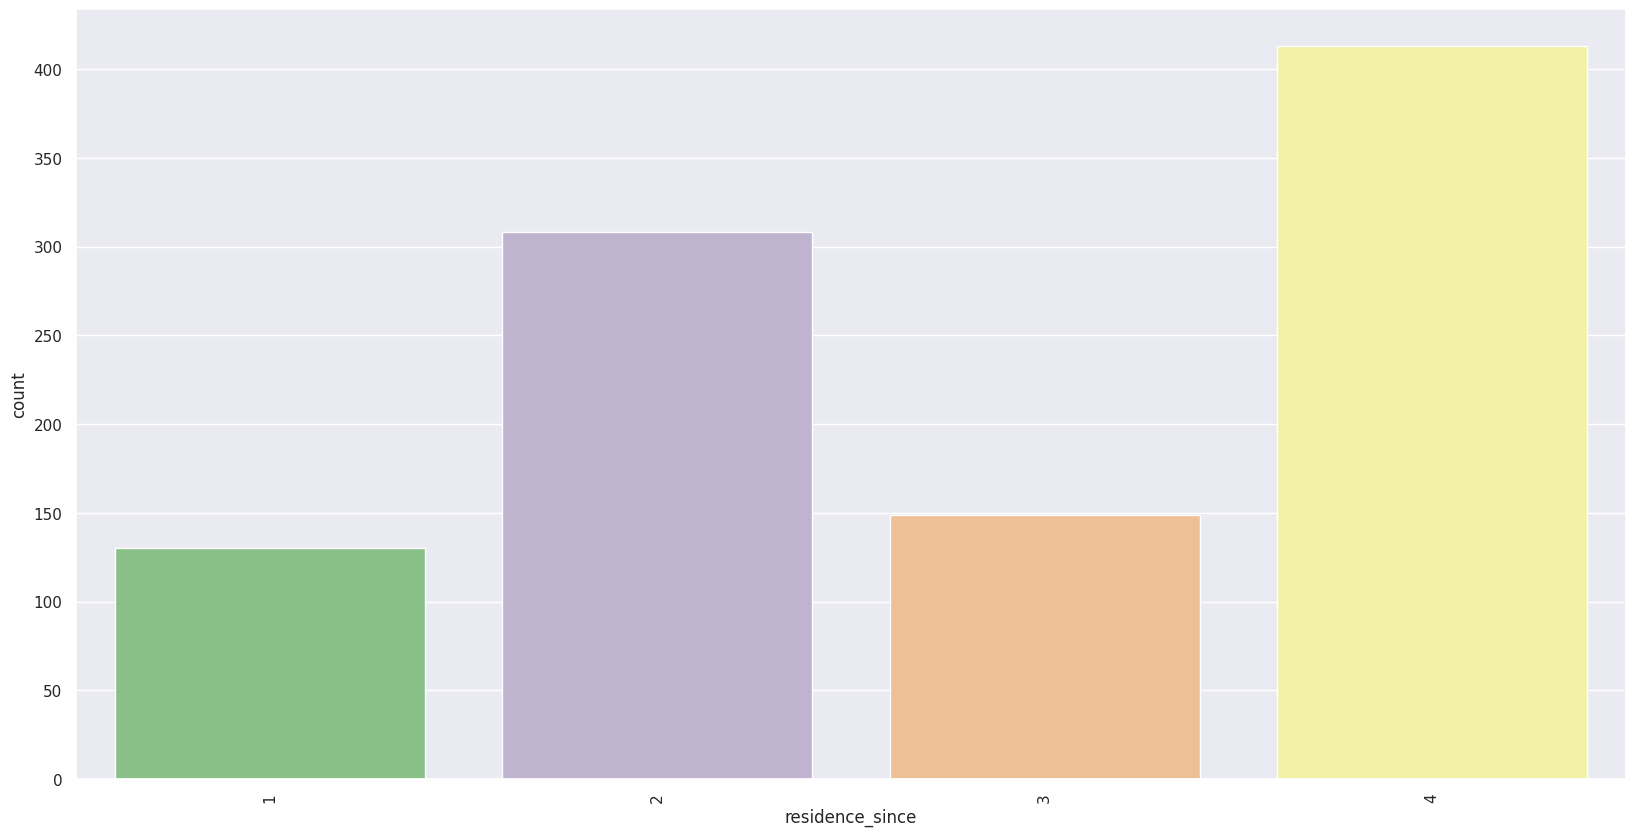

/tmp/ipython-input-1573138527.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,


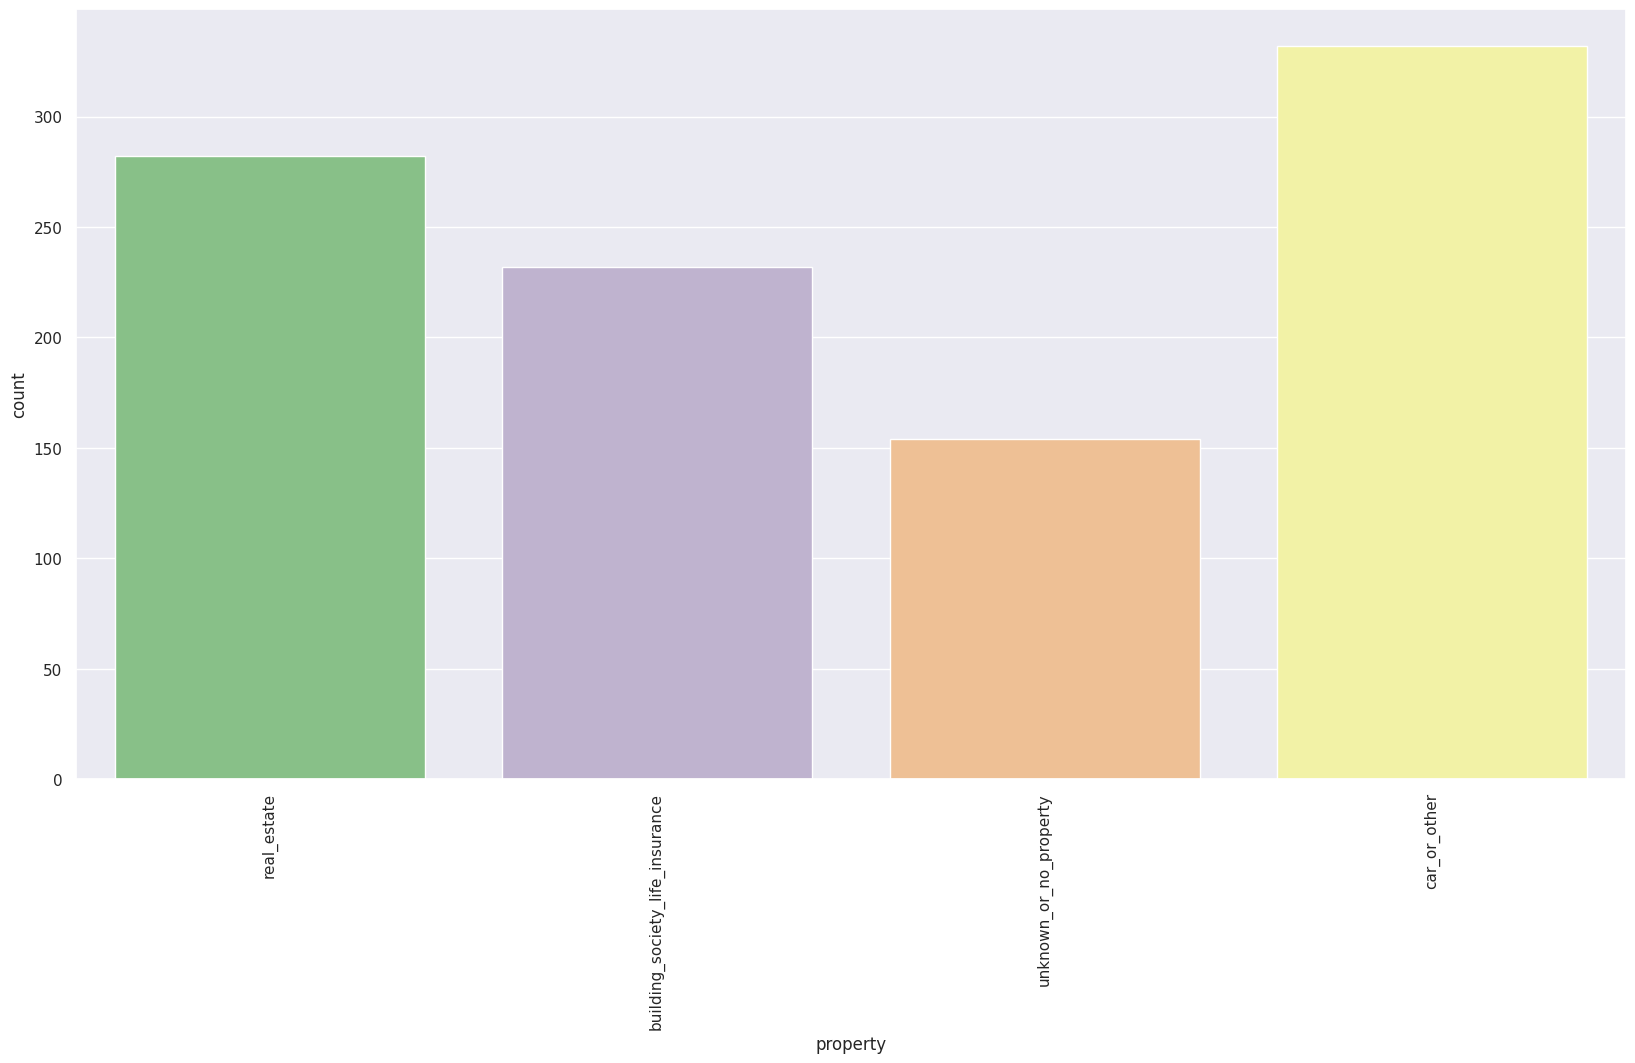

/tmp/ipython-input-1573138527.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,


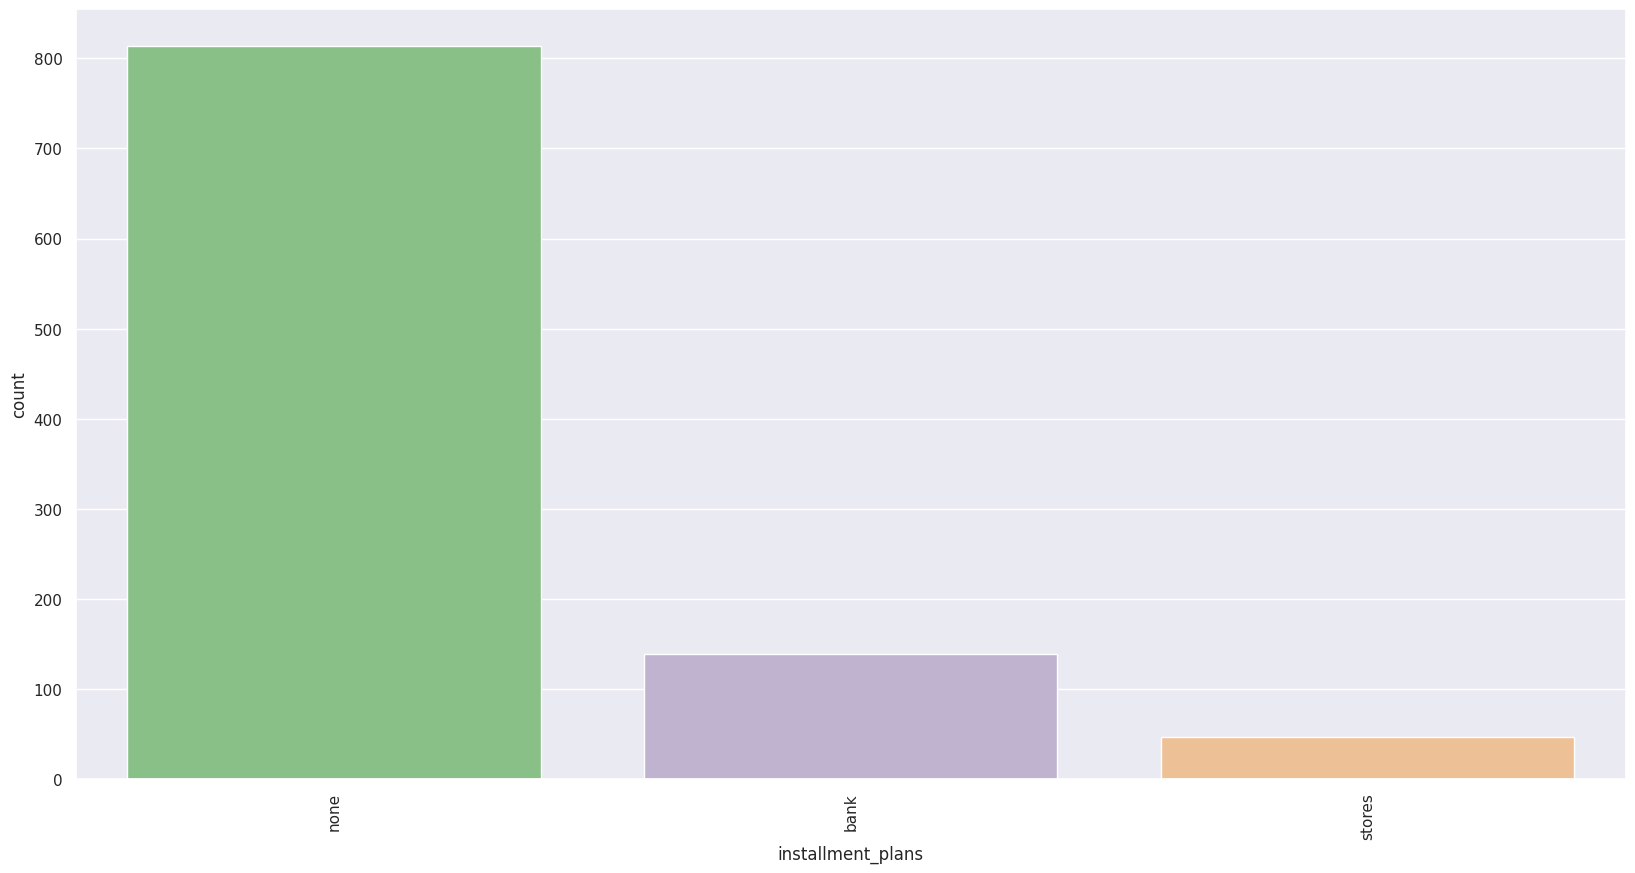

/tmp/ipython-input-1573138527.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,


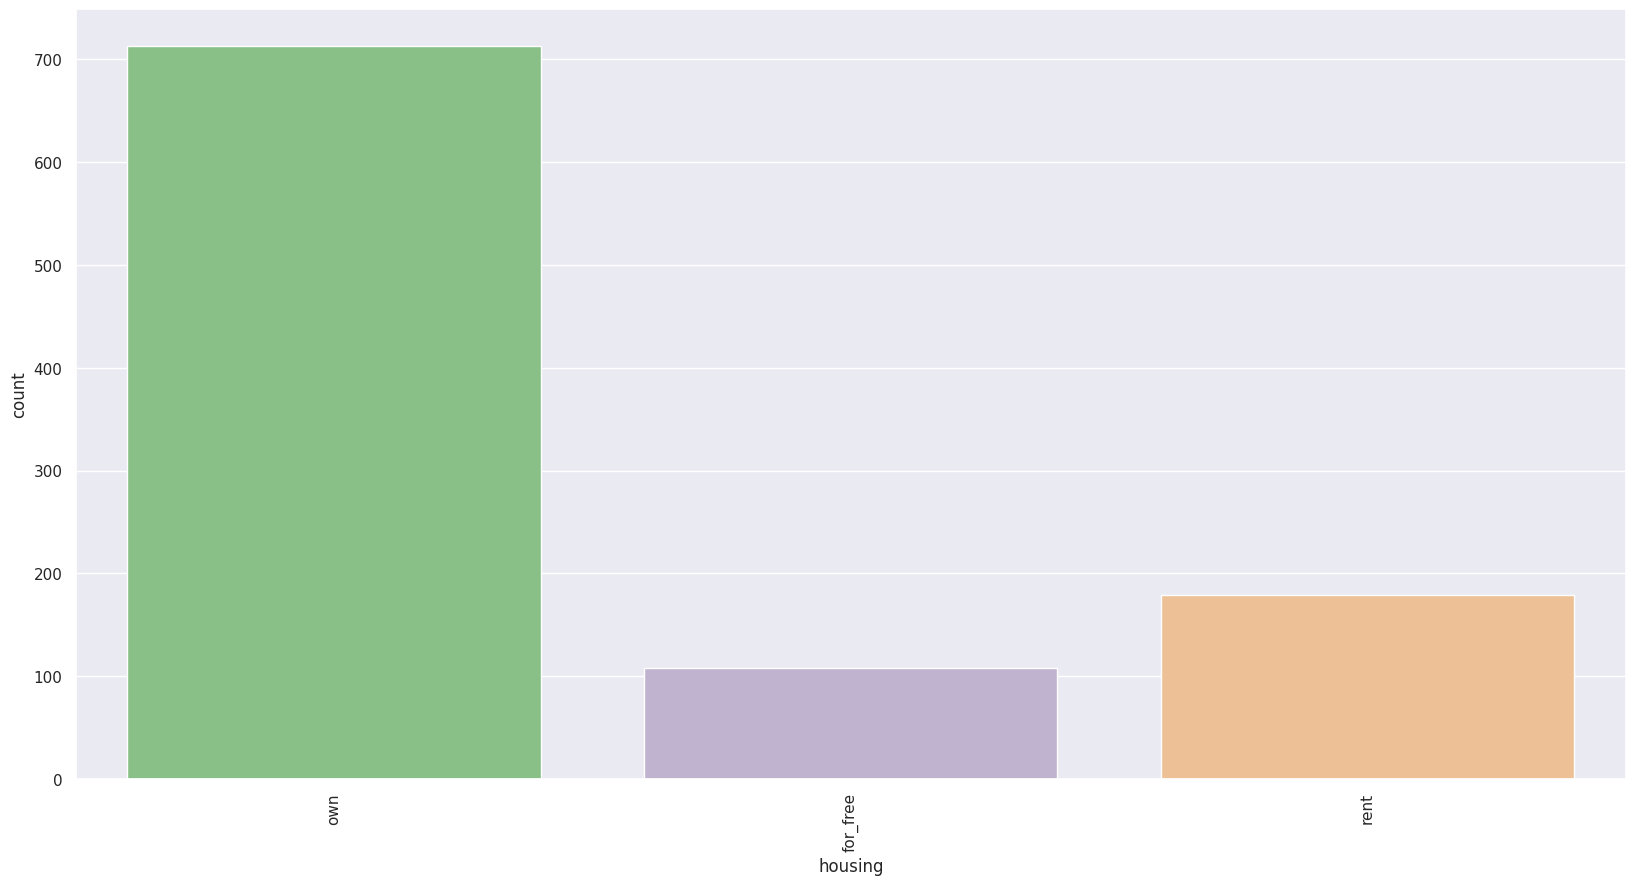

/tmp/ipython-input-1573138527.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,


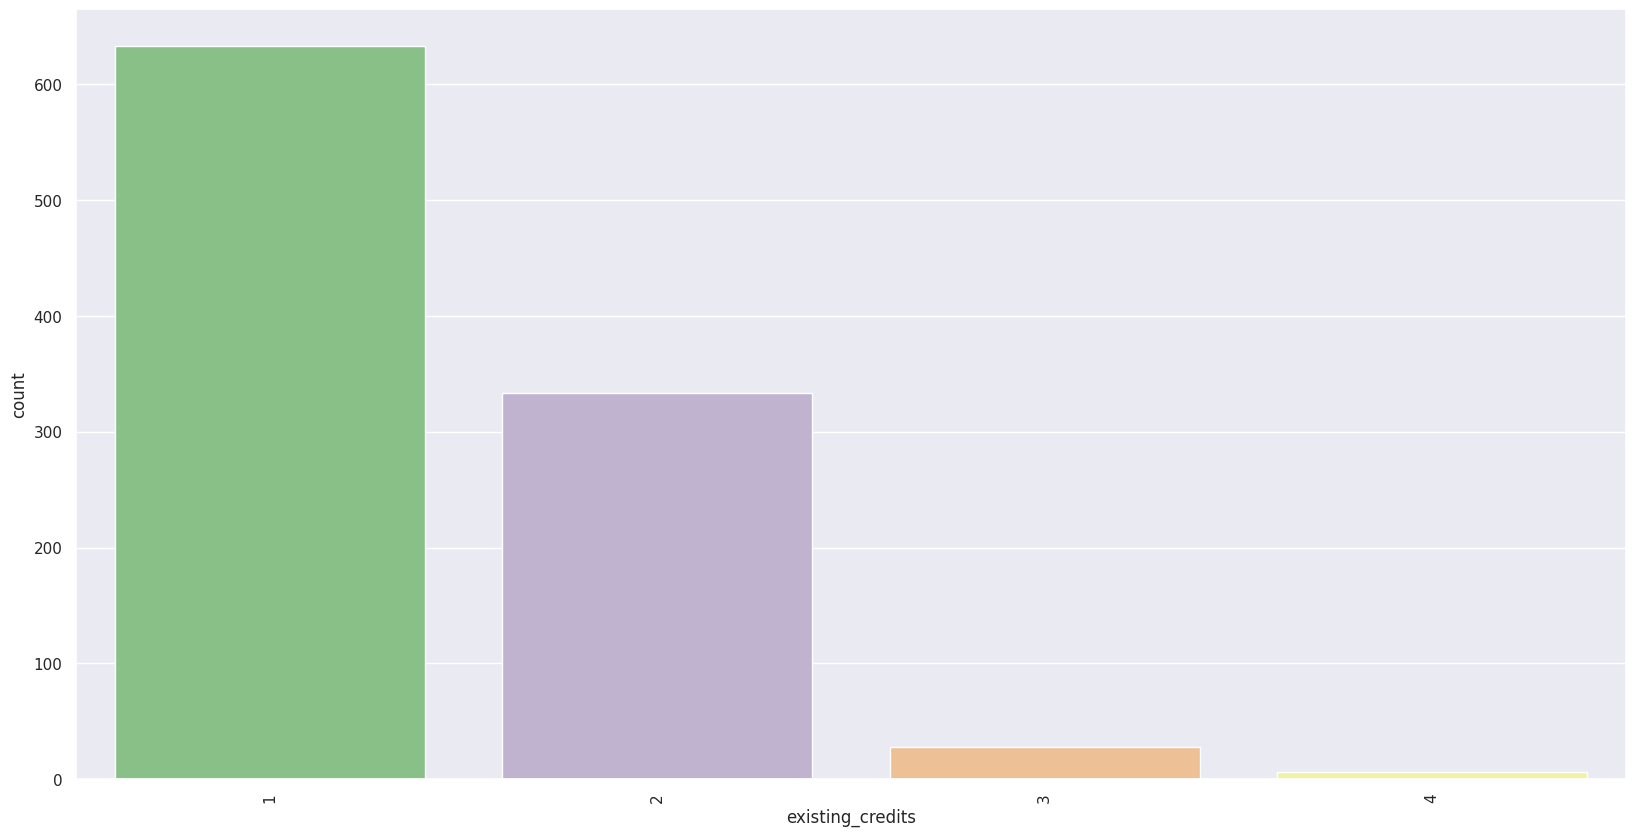

/tmp/ipython-input-1573138527.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,


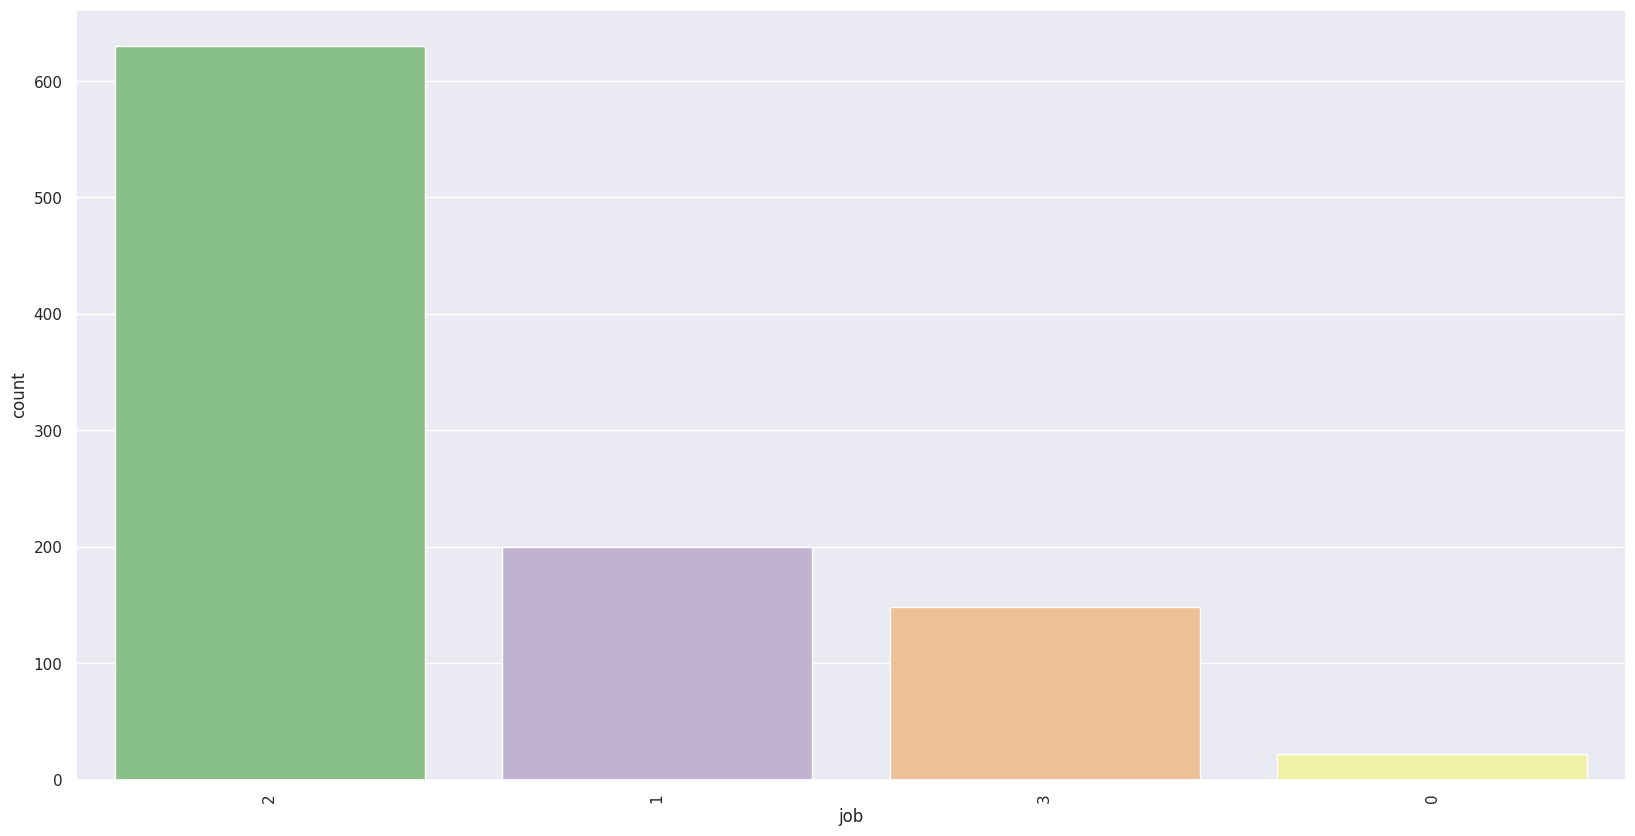

In [175]:
for i in categoric:
    sns.countplot(data=df,
                       x=df[i],
                       palette='Accent')
    plt.xticks(rotation=90)
    plt.show()

In [176]:
import pandas as pd
import scipy.stats as stats
from itertools import combinations

def chi_square_matrix(df, alpha=0.05):

    categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns
    results = []

    for col1, col2 in combinations(categorical_cols, 2):
        contingency = pd.crosstab(df[col1], df[col2])


        if contingency.shape[0] < 2 or contingency.shape[1] < 2:
            continue

        chi2, p, dof, expected = stats.chi2_contingency(contingency)
        results.append({
            'Variable 1': col1,
            'Variable 2': col2,
            'Chi2': round(chi2, 3),
            'p-value': round(p, 4),
            'Related?': '❗️Yes' if p < alpha else 'No'
        })

    result_df = pd.DataFrame(results).sort_values(by='p-value')
    return result_df


In [177]:
chi_matrix = chi_square_matrix(df)
display(chi_matrix)


,Variable 1,Variable 2,Chi2,p-value,Related?
0,checking_account,credit_history,60.332,0.0000,❗️Yes
1,checking_account,purpose,58.343,0.0000,❗️Yes
2,checking_account,savings_account,92.473,0.0000,❗️Yes
9,credit_history,purpose,93.716,0.0000,❗️Yes
14,credit_history,installment_plans,92.767,0.0000,❗️Yes
20,purpose,property,109.221,0.0000,❗️Yes
23,purpose,job,72.605,0.0000,❗️Yes
22,purpose,housing,79.084,0.0000,❗️Yes
30,employment_since,sex,49.704,0.0000,❗️Yes
31,employment_since,property,64.938,0.0000,❗️Yes


In [178]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    """
    Calculates the strength of association (Cramer's V) between two categorical variables.
    """
    contingency_table = pd.crosstab(x, y)
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()

    # Calculate phi squared
    phi2 = chi2 / n

    # Get dimensions (rows and columns)
    r, k = contingency_table.shape

    # Calculate Cramer's V
    v = np.sqrt(phi2 / min(r - 1, k - 1))
    return v

In [179]:
# df: Your cleaned dataset after mapping
# y: Your dependent variable (y_encoded)

categorical_cols = ['checking_account', 'credit_history', 'purpose', 'savings_account', 'employment_since', 'sex', 'residence_since', 'property', 'installment_plans', 'housing', 'existing_credits', 'job']

# Dictionary to store the V-values (Explanatory Power)
explanatory_power = {}

for col in categorical_cols:
    # df[col] is your categorical independent variable
    # y is your dependent variable (y_encoded)
    v_value = cramers_v(df[col], y['Creditability']) # Select the single column from y
    explanatory_power[col] = v_value

# Sort the results in descending order based on the strength of the relationship
results = pd.Series(explanatory_power).sort_values(ascending=False)
print("Explanatory Power with Respect to the Dependent Variable (Cramer's V):")
print(results)

Explanatory Power with Respect to the Dependent Variable (Cramer's V):
checking_account     0.351740
credit_history       0.248378
savings_account      0.189997
purpose              0.175376
property             0.154012
employment_since     0.135530
housing              0.134907
installment_plans    0.113310
sex                  0.073134
existing_credits     0.051684
job                  0.043418
residence_since      0.027373
dtype: float64


In [180]:
columns_to_drop = ["sex", "existing_credits", "residence_since", "property", "purpose"]
df = df.drop(columns=columns_to_drop)
display(df.head())

,checking_account,duration,credit_history,credit_amount,savings_account,employment_since,installment_rate,age,installment_plans,housing,job
0,>0,6,critical_account_other_loans,1169,unknown,+7,4,67,none,own,2
1,200,48,existing_credits_paid,5951,100,4,2,22,none,own,2
2,no checking account,12,critical_account_other_loans,2096,100,7,2,49,none,own,1
3,>0,42,existing_credits_paid,7882,100,7,2,45,none,for_free,2
4,>0,24,delayed_payment,4870,100,4,3,53,none,for_free,2


In [181]:
categoric = [col for col in categoric if col not in columns_to_drop]
display(categoric)

['checking_account',
 'credit_history',
 'savings_account',
 'employment_since',
 'installment_plans',
 'housing',
 'job']

In [182]:
y_encoded = pd.get_dummies(y, drop_first=False)

In [183]:
df_encoded = pd.get_dummies(df, columns=categoric, drop_first=True, dtype=int)
df_encoded

,duration,credit_amount,installment_rate,age,checking_account_200+,checking_account_>0,checking_account_no checking account,credit_history_critical_account_other_loans,credit_history_delayed_payment,credit_history_existing_credits_paid,...,employment_since_4,employment_since_7,employment_since_unemployed,installment_plans_none,installment_plans_stores,housing_own,housing_rent,job_1,job_2,job_3
0,6,1169,4,67,0,1,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
1,48,5951,2,22,0,0,0,0,0,1,...,1,0,0,1,0,1,0,0,1,0
2,12,2096,2,49,0,0,1,1,0,0,...,0,1,0,1,0,1,0,1,0,0
3,42,7882,2,45,0,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
4,24,4870,3,53,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,31,0,0,1,0,0,1,...,0,1,0,1,0,1,0,1,0,0
996,30,3857,4,40,0,1,0,0,0,1,...,1,0,0,1,0,1,0,0,0,1
997,12,804,4,38,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,1,0
998,45,1845,4,23,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0


In [184]:
from sklearn.model_selection import train_test_split

In [185]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y_encoded, test_size=0.2, random_state=42)

In [186]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Create the model (max_iter is increased to ensure convergence)
log_model = LogisticRegression(random_state=42, max_iter=300)

# Train the Model
log_model.fit(X_train, y_train)

# Make Predictions
y_pred = log_model.predict(X_test)
y_proba = log_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred))
print("AUC Score (Model Performance):", roc_auc_score(y_test, y_proba))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           1       0.79      0.87      0.83       141
           2       0.59      0.46      0.51        59

    accuracy                           0.74       200
   macro avg       0.69      0.66      0.67       200
weighted avg       0.73      0.74      0.73       200

AUC Score (Model Performance): 0.8063469166967183


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [187]:
import statsmodels.api as sm
import pandas as pd

X_const = sm.add_constant(X_train)

y_train_sm = y_train['Creditability'].apply(lambda x: 1 if x == 2 else 0)

model = sm.Logit(y_train_sm, X_const)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.489572
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:          Creditability   No. Observations:                  800
Model:                          Logit   Df Residuals:                      773
Method:                           MLE   Df Model:                           26
Date:                Tue, 21 Oct 2025   Pseudo R-squ.:                  0.1999
Time:                        11:36:32   Log-Likelihood:                -391.66
converged:                       True   LL-Null:                       -489.54
Covariance Type:            nonrobust   LLR p-value:                 5.701e-28
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                     